# CAR PRICE PREDICTION

## PROBLEM STATEMENT

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model. This project contains two phase-

## Data Collection Phase

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you.
more the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and
at last target variable Price of the car. This data is to give you a hint about important variables in
used car model. You can make changes to it, you can add or you can remove some columns, it
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan,
Hatchback.

## Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all
data pre-processing steps. Try different models with different hyper parameters and select the best
model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Printing all the columns and Row names

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# Importing the data

df=pd.read_csv('used_car_prediction_data.csv')
df.head(10)

,Unnamed: 0,Car_Name,Running_kms,Fuel_Type,Gear Transmission,Milleage,Engine,Seat,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Price
0,0,2014 Hyundai Xcent,"43,701 kms",Petrol,Manual,20.73,1373 CC,5,Grey,Ventilated Disc,k14B VVT Engine,4490,1730,1485,2650,"4,70 000"
1,1,2014 Hyundai Grand i10,"43,980 kms",Petrol,Manual,21.21,1197 CC,5,Oxford Blue,Disc,K Series VVT Engine,3995,1735,1515,2450,"4,33 000"
2,2,2014 Honda Brio,"21,420 kms",Petrol,Manual,21.10,998 CC,5,Fire Red,Disc,Boosterjet Petrol Engine,3995,1745,1510,2520,"4,20 000"
3,3,2021 Maruti Swift Dzire,752 kms,Petrol,Manual,20.65,1462 CC,5,Nexa Blue,Ventilated Disc,K15 Smart Hybrid Petrol Engine,4490,1730,1485,2650,"7,90 000"
4,4,2018 Toyota Yaris,"7,599 kms",Petrol,Manual,21.01,1197 CC,5,Blue,Disc,1.2L VVT Engine,3995,1745,1510,2520,"9,46 000"
5,5,2021 Nissan Kicks,"13,542 kms",Petrol,Manual,21.40,1197 CC,5,White,Disc,VVT Petrol Engine,3995,1745,1510,2520,"10,38 000"
6,6,2019 Hyundai Verna,"42,614 kms",Petrol,Manual,17.40,1497 CC,5,White,Ventilated Disc,i VTEC Engine,4440,1695,1495,2600,"9,33 000"
7,7,2019 Hyundai Verna,"44,293 kms",Petrol,Automatic,20.63,1198 CC,5,Blue,Disc,Petrol Engine,3785,1635,1490,2450,"12,20 000"
8,8,2016 Volkswagen Vento,"39,655 kms",Petrol,Automatic,21.40,1197 CC,5,Pearl Phoenix Red,Disc,VVT Petrol Engine,3995,1745,1510,2520,"8,21 000"
9,9,2021 Honda WR-V,"4,396 kms",Petrol,Manual,17.50,1199 CC,5,Orange,Ventilated Disc,i-VTEC Petrol Engine,3999,1734,1601,2555,"9,94 000"


In [4]:
# Let's drop the unnamed:0 column

df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df.head(5)

,Car_Name,Running_kms,Fuel_Type,Gear Transmission,Milleage,Engine,Seat,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Price
0,2014 Hyundai Xcent,"43,701 kms",Petrol,Manual,20.73,1373 CC,5,Grey,Ventilated Disc,k14B VVT Engine,4490,1730,1485,2650,"4,70 000"
1,2014 Hyundai Grand i10,"43,980 kms",Petrol,Manual,21.21,1197 CC,5,Oxford Blue,Disc,K Series VVT Engine,3995,1735,1515,2450,"4,33 000"
2,2014 Honda Brio,"21,420 kms",Petrol,Manual,21.10,998 CC,5,Fire Red,Disc,Boosterjet Petrol Engine,3995,1745,1510,2520,"4,20 000"
3,2021 Maruti Swift Dzire,752 kms,Petrol,Manual,20.65,1462 CC,5,Nexa Blue,Ventilated Disc,K15 Smart Hybrid Petrol Engine,4490,1730,1485,2650,"7,90 000"
4,2018 Toyota Yaris,"7,599 kms",Petrol,Manual,21.01,1197 CC,5,Blue,Disc,1.2L VVT Engine,3995,1745,1510,2520,"9,46 000"


In [6]:
# Checking the columns name

df.columns

Index(['Car_Name', 'Running_kms', 'Fuel_Type', 'Gear Transmission', 'Milleage',
       'Engine', 'Seat', 'Color', 'Front Brake', 'Engine_Type', 'Length',
       'Width', 'Height', 'Wheel_Base', 'Price'],
      dtype='object')

In [7]:
# Checking the data types
df.dtypes

Car_Name              object
Running_kms           object
Fuel_Type             object
Gear Transmission     object
Milleage             float64
Engine                object
Seat                   int64
Color                 object
Front Brake           object
Engine_Type           object
Length                 int64
Width                  int64
Height                 int64
Wheel_Base             int64
Price                 object
dtype: object

The data contains integer, object and float data types

In [8]:
# Checking the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           3693 non-null   object 
 1   Running_kms        3693 non-null   object 
 2   Fuel_Type          3693 non-null   object 
 3   Gear Transmission  3693 non-null   object 
 4   Milleage           3693 non-null   float64
 5   Engine             3693 non-null   object 
 6   Seat               3693 non-null   int64  
 7   Color              3693 non-null   object 
 8   Front Brake        3693 non-null   object 
 9   Engine_Type        3693 non-null   object 
 10  Length             3693 non-null   int64  
 11  Width              3693 non-null   int64  
 12  Height             3693 non-null   int64  
 13  Wheel_Base         3693 non-null   int64  
 14  Price              3693 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 432.9+ KB


In [9]:
# Checking the null value

df.isnull().sum()

Car_Name             0
Running_kms          0
Fuel_Type            0
Gear Transmission    0
Milleage             0
Engine               0
Seat                 0
Color                0
Front Brake          0
Engine_Type          0
Length               0
Width                0
Height               0
Wheel_Base           0
Price                0
dtype: int64

There is no null value present in the data.

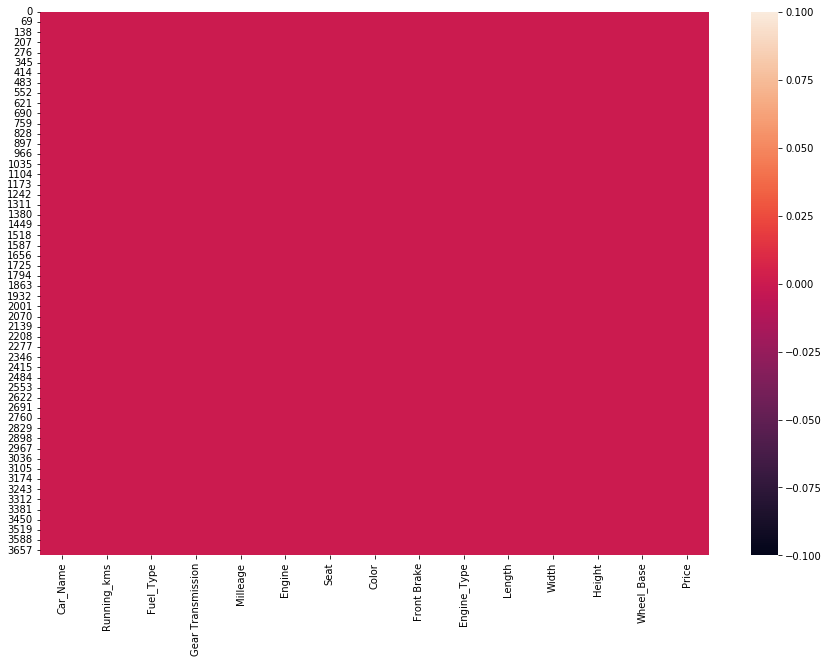

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.show()

In [11]:
# Checking the unique value

df.nunique()

Car_Name              85
Running_kms          120
Fuel_Type              2
Gear Transmission      2
Milleage              33
Engine                15
Seat                   1
Color                 24
Front Brake            2
Engine_Type           27
Length                21
Width                 19
Height                17
Wheel_Base            19
Price                111
dtype: int64

In [12]:
# Checking the count of data 
for i in df.columns:
    print(df[i].value_counts())
    print("---------------------------------------------")

2019 Hyundai Verna             136
2014 Hyundai Grand i10         129
2017 Hyundai Verna             124
2017 Hyundai i20               111
2017 Hyundai Grand i10          99
2017 Hyundai Creta              98
2020 Hyundai Grand i10 Nios     96
2016 Maruti Baleno              91
2015 Hyundai Grand i10          83
2014 Hyundai Xcent              68
2018 Toyota Yaris               68
2018 Maruti Ciaz                66
2017 Honda WR-V                 64
2017 Maruti Baleno              64
2016 Renault KWID               64
2021 Nissan Kicks               62
2019 Hyundai Creta              59
2021 Hyundai Venue              58
2016 Renault Duster             58
2017 Volkswagen Polo            57
2018 Honda Amaze                52
2016 Hyundai Grand i10          50
2021 Hyundai Creta              39
2021 Maruti Swift Dzire         39
2016 Mahindra KUV 100           39
2018 Volkswagen Polo            39
2016 Volkswagen Vento           39
2021 Honda WR-V                 39
2018 Skoda Octavia  

In [13]:
# In the Car Name it contains the Car Manufacturing year. Let's extract the manufacturing year from Car Name

df['Manufacturing_Year']=df['Car_Name'].str[0:4]
df['Cars_Name']=df['Car_Name'].str[4:]

In [14]:
df.sample(3)

,Car_Name,Running_kms,Fuel_Type,Gear Transmission,Milleage,Engine,Seat,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Price,Manufacturing_Year,Cars_Name
553,2019 Hyundai Creta,"6,989 kms",Petrol,Manual,19.10,1197 CC,5,Black,Disc,Kappa VTVT Petrol Engine,3995,1660,1520,2425,"4,70 000",2019,Hyundai Creta
914,2019 Hyundai Creta,"25,418 kms",Petrol,Manual,17.80,1198 CC,5,Red,Disc,i-VTEC Petrol Engine,3990,1680,1505,2405,"15,90 000",2019,Hyundai Creta
1200,2020 Kia Seltos,"28,378 kms",Petrol,Manual,20.85,1197 CC,5,White,Ventilated Disc,K Series VVT Engine,3995,1695,1555,2430,"11,80 000",2020,Kia Seltos


In [15]:
# Let's drop the Car_Name,

df.drop(columns='Car_Name',inplace=True)

In [16]:
df['Running_Kms']=df['Running_kms'].str.replace('kms','') #removed the kms from Running Kms

In [17]:
df.dtypes

Running_kms            object
Fuel_Type              object
Gear Transmission      object
Milleage              float64
Engine                 object
Seat                    int64
Color                  object
Front Brake            object
Engine_Type            object
Length                  int64
Width                   int64
Height                  int64
Wheel_Base              int64
Price                  object
Manufacturing_Year     object
Cars_Name              object
Running_Kms            object
dtype: object

In [18]:
df['Price']=df['Price'].str.replace(',',"")

In [19]:
df.head()

,Running_kms,Fuel_Type,Gear Transmission,Milleage,Engine,Seat,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Price,Manufacturing_Year,Cars_Name,Running_Kms
0,"43,701 kms",Petrol,Manual,20.73,1373 CC,5,Grey,Ventilated Disc,k14B VVT Engine,4490,1730,1485,2650,470 000,2014,Hyundai Xcent,"43,701"
1,"43,980 kms",Petrol,Manual,21.21,1197 CC,5,Oxford Blue,Disc,K Series VVT Engine,3995,1735,1515,2450,433 000,2014,Hyundai Grand i10,"43,980"
2,"21,420 kms",Petrol,Manual,21.10,998 CC,5,Fire Red,Disc,Boosterjet Petrol Engine,3995,1745,1510,2520,420 000,2014,Honda Brio,"21,420"
3,752 kms,Petrol,Manual,20.65,1462 CC,5,Nexa Blue,Ventilated Disc,K15 Smart Hybrid Petrol Engine,4490,1730,1485,2650,790 000,2021,Maruti Swift Dzire,752
4,"7,599 kms",Petrol,Manual,21.01,1197 CC,5,Blue,Disc,1.2L VVT Engine,3995,1745,1510,2520,946 000,2018,Toyota Yaris,"7,599"


In [20]:
df['Price']=df['Price'].str.replace('Lakh','100000')
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].str.replace(' ',"")

In [21]:
df.dtypes

Running_kms            object
Fuel_Type              object
Gear Transmission      object
Milleage              float64
Engine                 object
Seat                    int64
Color                  object
Front Brake            object
Engine_Type            object
Length                  int64
Width                   int64
Height                  int64
Wheel_Base              int64
Price                  object
Manufacturing_Year     object
Cars_Name              object
Running_Kms            object
dtype: object

In [22]:
df['Running_Kms']=df['Running_Kms'].str.replace(',',"")

In [23]:
df.drop(columns='Running_kms',inplace=True)

In [24]:
df.sample(2)

,Fuel_Type,Gear Transmission,Milleage,Engine,Seat,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Price,Manufacturing_Year,Cars_Name,Running_Kms
1036,Petrol,Manual,17.01,1591 CC,5,Black,Disc,VTVT Petrol Engine,4375,1700,1475,2570,468000,2017,Hyundai i20,25356
2922,Petrol,Manual,17.40,1497 CC,5,Red,Ventilated Disc,i VTEC Engine,4440,1695,1495,2600,896000,2017,Hyundai Creta,66477


In [25]:
df['Running_Kms'] = df['Running_Kms'].astype('float')

In [26]:
df['Running_Kms'].dtypes

dtype('float64')

In [27]:
df['price']=df['Price'].astype('float')

In [28]:
df['Price'].dtypes

dtype('O')

In [29]:
df[['car_price']]=df.Price.str.split(expand=True)

In [30]:
df['car_price']=df['car_price'].astype('float')

In [31]:
df['car_price'].dtypes

dtype('float64')

In [32]:
df.dtypes

Fuel_Type              object
Gear Transmission      object
Milleage              float64
Engine                 object
Seat                    int64
Color                  object
Front Brake            object
Engine_Type            object
Length                  int64
Width                   int64
Height                  int64
Wheel_Base              int64
Price                  object
Manufacturing_Year     object
Cars_Name              object
Running_Kms           float64
price                 float64
car_price             float64
dtype: object

In [33]:
df.drop(columns=['Price','price'],inplace=True)

In [34]:
df.sample(3)

,Fuel_Type,Gear Transmission,Milleage,Engine,Seat,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Manufacturing_Year,Cars_Name,Running_Kms,car_price
2576,Petrol,Manual,19.10,1197 CC,5,Grey,Ventilated Disc,K Series VVT Engine,3995,1695,1555,2430,2018,Hyundai Santro,31873.0,831000.0
3668,Diesel,Manual,23.84,1199 CC,5,Silver,Disc,Revotron Engine,3746,1647,1535,2400,2016,Hyundai Verna,44931.0,1122000.0
861,Petrol,Manual,18.00,1198 CC,5,Urban Titanium Metallic,Disc,i-VTEC Petrol Engine,3990,1680,1505,2405,2014,Hyundai Grand i10,56114.0,510000.0


In [35]:
df.Manufacturing_Year=df.Manufacturing_Year.astype('float')

In [36]:
df['Car_Age']=2022-df['Manufacturing_Year']

In [37]:
df.head()

,Fuel_Type,Gear Transmission,Milleage,Engine,Seat,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Manufacturing_Year,Cars_Name,Running_Kms,car_price,Car_Age
0,Petrol,Manual,20.73,1373 CC,5,Grey,Ventilated Disc,k14B VVT Engine,4490,1730,1485,2650,2014.0,Hyundai Xcent,43701.0,470000.0,8.0
1,Petrol,Manual,21.21,1197 CC,5,Oxford Blue,Disc,K Series VVT Engine,3995,1735,1515,2450,2014.0,Hyundai Grand i10,43980.0,433000.0,8.0
2,Petrol,Manual,21.10,998 CC,5,Fire Red,Disc,Boosterjet Petrol Engine,3995,1745,1510,2520,2014.0,Honda Brio,21420.0,420000.0,8.0
3,Petrol,Manual,20.65,1462 CC,5,Nexa Blue,Ventilated Disc,K15 Smart Hybrid Petrol Engine,4490,1730,1485,2650,2021.0,Maruti Swift Dzire,752.0,790000.0,1.0
4,Petrol,Manual,21.01,1197 CC,5,Blue,Disc,1.2L VVT Engine,3995,1745,1510,2520,2018.0,Toyota Yaris,7599.0,946000.0,4.0


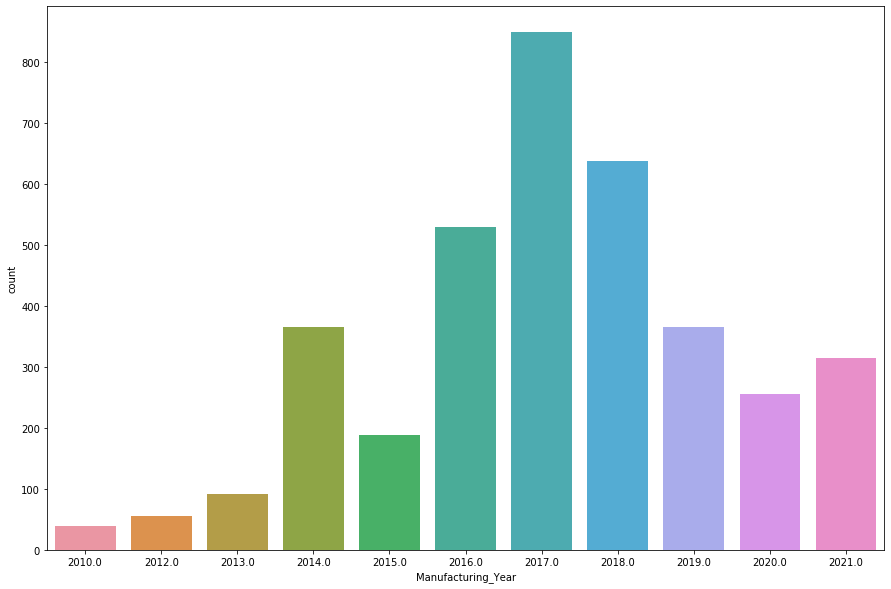

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(df['Manufacturing_Year'])

In 2017 The car sell was high. In 2010 the market was down and there is very less sell in 2010.

In [39]:
# Let's drop the manufacturing_year from the dataset

df.drop(columns='Manufacturing_Year',inplace=True)

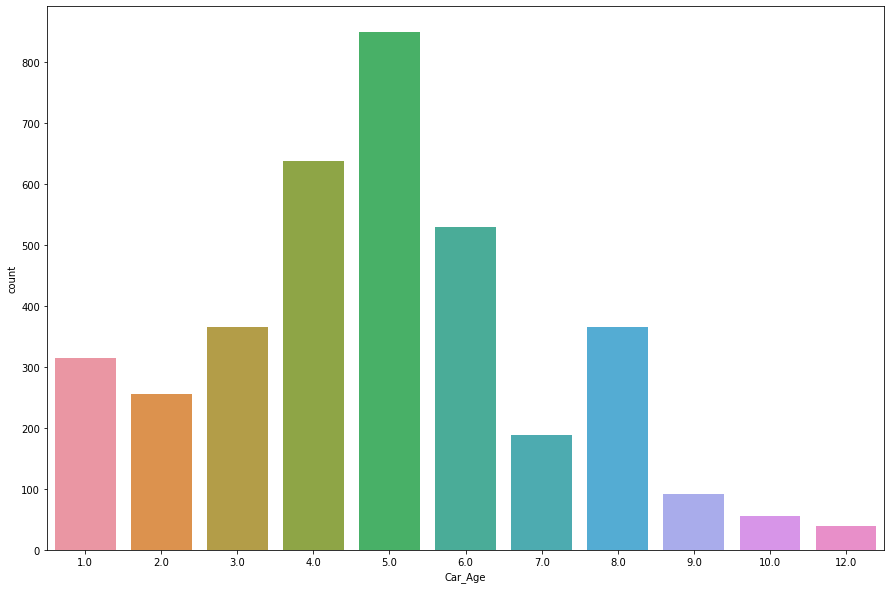

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(df['Car_Age'])
plt.show()

In the used car the 5 years cars is high and 12 years used car is very low. It is obvious that if the car age is less people used to buy the car, if it is more age, people are not willing to buy the car.

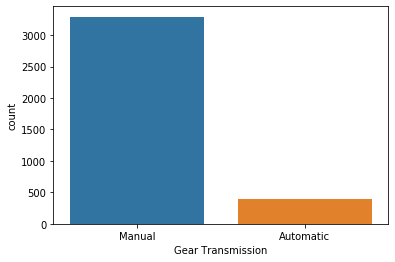

In [41]:
sns.countplot(df['Gear Transmission'])

We see clearly that Manual Gear Transmission Car count is high as compare to Automatic.

In [42]:
df['Gear Transmission'].value_counts()

Manual       3293
Automatic     400
Name: Gear Transmission, dtype: int64

In [43]:
df.columns

Index(['Fuel_Type', 'Gear Transmission', 'Milleage', 'Engine', 'Seat', 'Color',
       'Front Brake', 'Engine_Type', 'Length', 'Width', 'Height', 'Wheel_Base',
       'Cars_Name', 'Running_Kms', 'car_price', 'Car_Age'],
      dtype='object')

Petrol    3288
Diesel     405
Name: Fuel_Type, dtype: int64


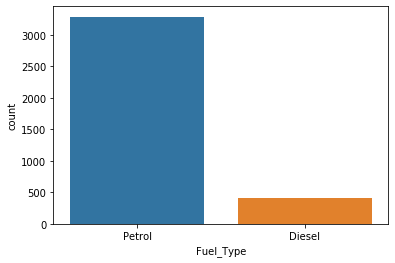

In [44]:
# Showing the count of FuelType
print(df['Fuel_Type'].value_counts())
sns.countplot(df['Fuel_Type'])
plt.show()

In FuelType Petrol Count is high than Diesel. This shows that majority of people using the fuel type petrol.

1197 CC    1240
1591 CC     418
1497 CC     323
1198 CC     308
1462 CC     256
1199 CC     250
998 CC      250
1248 CC     119
1798 CC     119
1498 CC     100
1373 CC      67
1984 CC      66
1496 CC      61
1298 CC      58
1598 CC      58
Name: Engine, dtype: int64


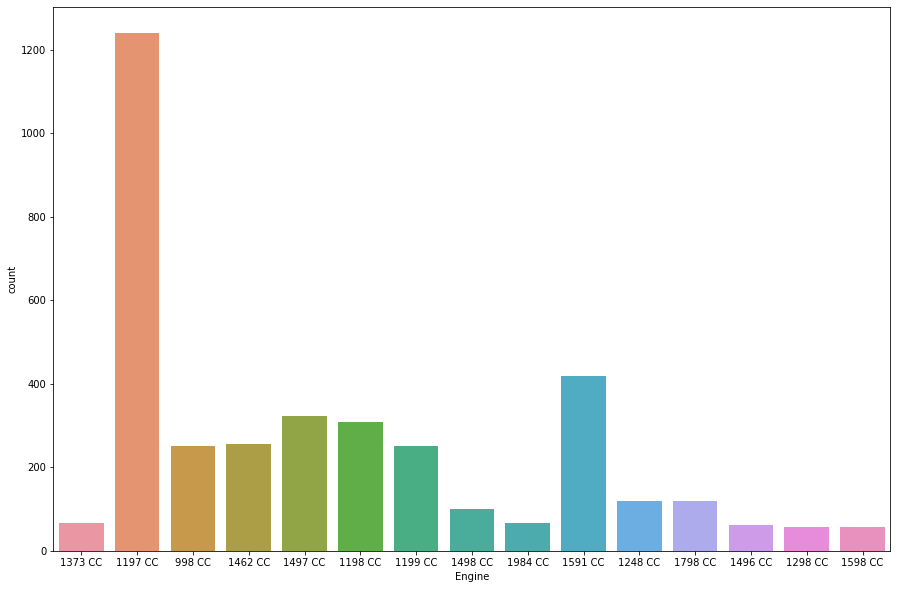

In [45]:
# Showing the count of Engine
print(df['Engine'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df['Engine'])
plt.show()

1197 CC Engine count is high as compare to others engine.

5    3693
Name: Seat, dtype: int64


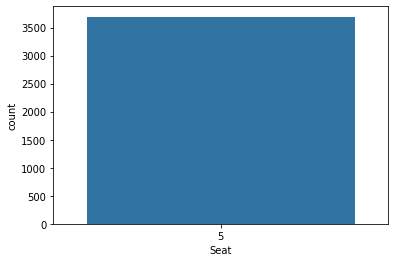

In [46]:
# Showing the count of Engine
print(df['Seat'].value_counts())
sns.countplot(df['Seat'])
plt.show()

In the Seat it has only one unique value 5.

Blue                        625
Grey                        438
Red                         420
White                       256
Black                       241
Silver                      232
Orange                      134
Brown                       127
Fire Red                    125
StarDust                    119
Fiery Red                   119
Twilight Blue               119
Pearl Phoenix Red            67
Nexa Blue                    67
Oxford Blue                  67
Phantom Black                61
Phantom Brown                61
Pearl Arctic White           61
Golden Brown Metallic        61
Metallic Glistening Grey     61
Polar White                  58
Urban Titanium Metallic      58
Grey Metallic                58
Golden                       58
Name: Color, dtype: int64


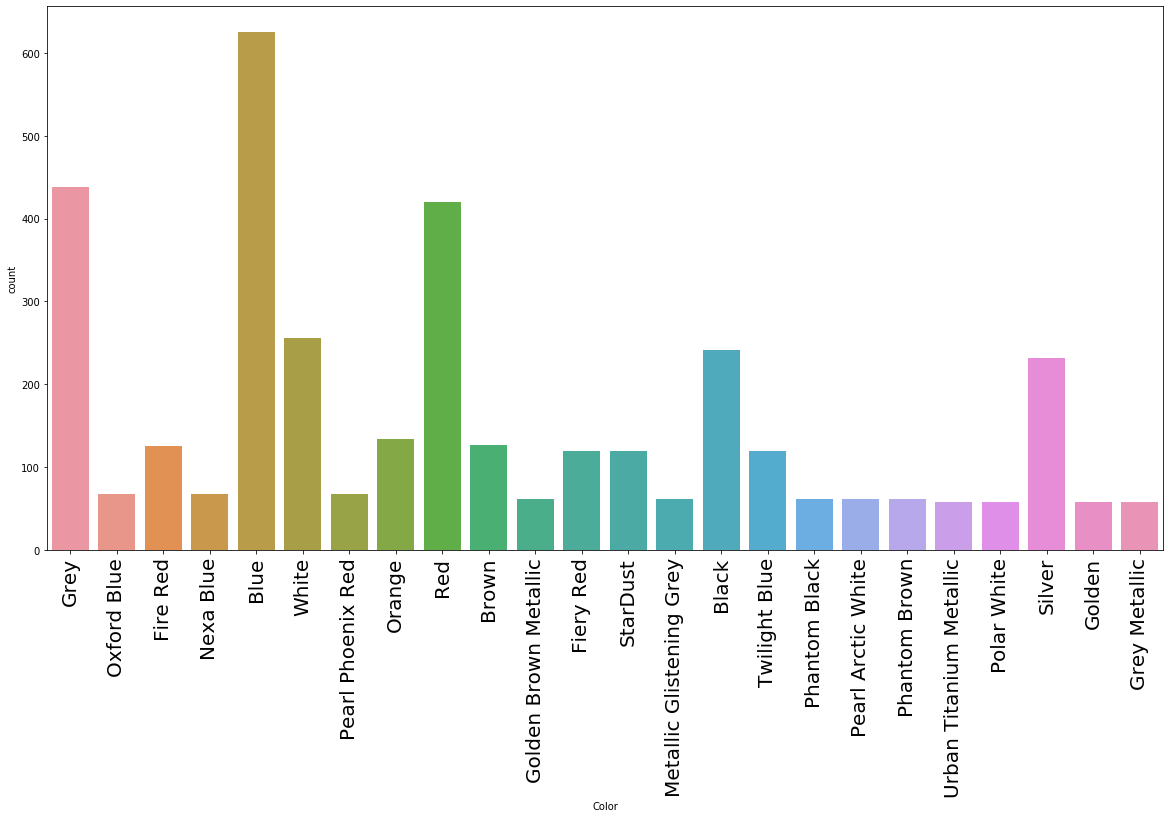

In [47]:
# Checking the Car Color count
print(df['Color'].value_counts())
plt.figure(figsize=(20,10))
sns.countplot(df['Color'])
plt.xticks(rotation=90,fontsize=20)
plt.show()

Blue Color car count is high,then comes next Grey and then Red. 

Kappa VTVT Petrol Engine          540
VTVT Petrol Engine                418
K Series VVT Engine               308
i-VTEC Petrol Engine              305
i VTEC Engine                     262
K15 Smart Hybrid Petrol Engine    134
VVT Petrol Engine                 134
Petrol Engine                     133
Boosterjet Petrol Engine          125
Revotron Engine                   125
k15B VVT Engine                   122
2ZR-FE Petrol Engine              119
Diesel Engine                     100
TSI Petrol Engine                  67
K Series Petrol Engine             67
k14B VVT Engine                    67
1.2L VVT Engine                    67
2.0 Turbocharged petrol engine     66
MPI Petrol Engine                  61
1.5 l MPi petrol                   61
1.5 Dual VVT-i Engine              61
DDIS 200 Engine                    61
VTVT Engine                        58
In-Line Engine                     58
K10B Engine                        58
DDiS Diesel Engine                 58
In-Line Petr

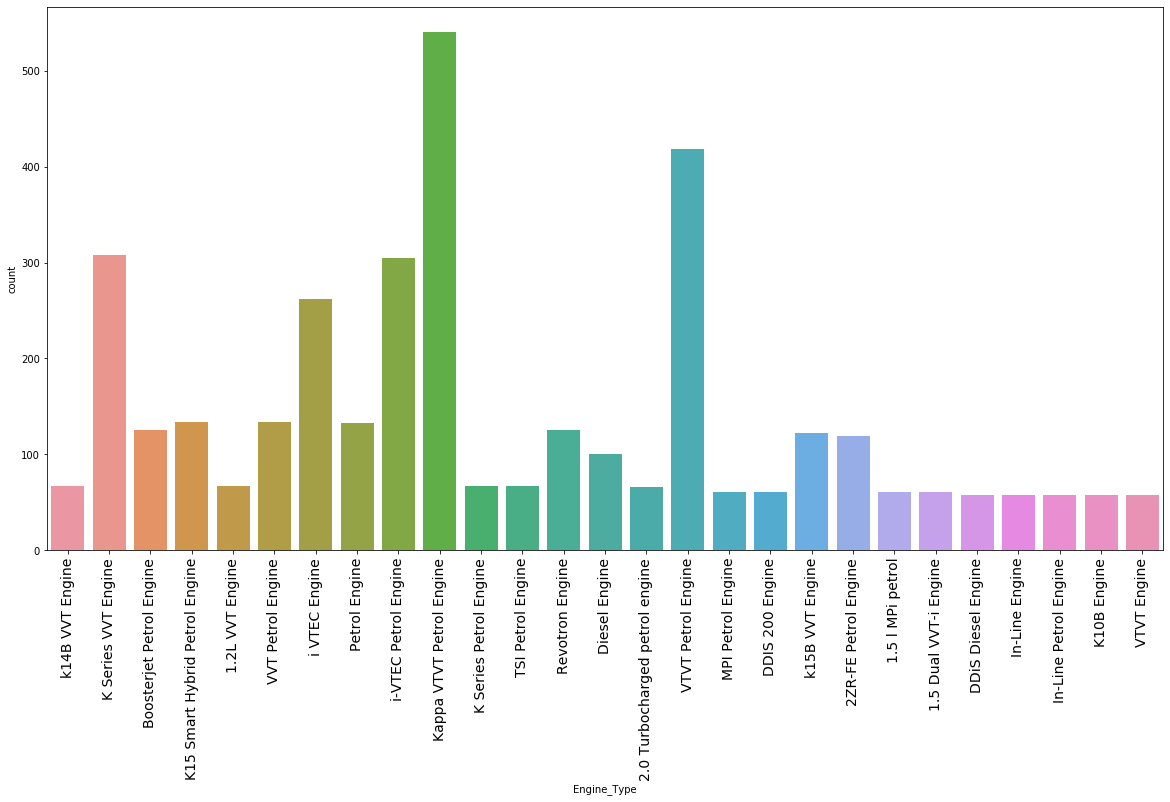

In [48]:
# Checking the count of Engine Type
print(df['Engine_Type'].value_counts())
plt.figure(figsize=(20,10))
sns.countplot(df['Engine_Type'])
plt.xticks(rotation=90,fontsize=14)
plt.show()

Kappa VTVT Petrol Engine type count is high as compare to other Engine Type.

Disc               2502
Ventilated Disc    1191
Name: Front Brake, dtype: int64


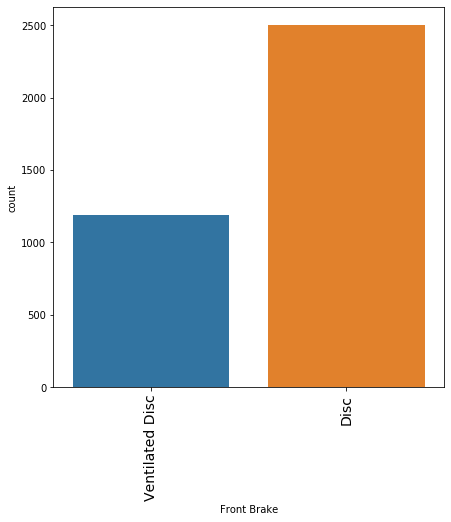

In [49]:
print(df['Front Brake'].value_counts())
plt.figure(figsize=(7,7))
sns.countplot(df['Front Brake'])
plt.xticks(rotation=90,fontsize=14)
plt.show()

Disc count is high than Ventilated Disc.

In [50]:
df.dtypes # checking the data types

Fuel_Type             object
Gear Transmission     object
Milleage             float64
Engine                object
Seat                   int64
Color                 object
Front Brake           object
Engine_Type           object
Length                 int64
Width                  int64
Height                 int64
Wheel_Base             int64
Cars_Name             object
Running_Kms          float64
car_price            float64
Car_Age              float64
dtype: object

In [51]:
df.to_excel("Used_car_data.xlsx") # Saving the data in excel file

In [52]:
# Checking the description of data

df.describe()

,Milleage,Seat,Length,Width,Height,Wheel_Base,Running_Kms,car_price,Car_Age
count,3693.000000,3693.0,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3.693000e+03,3693.000000
mean,19.332859,5.0,4149.184944,1702.638234,1502.815597,2518.076361,39796.992418,8.007763e+05,4.870295
std,2.685133,0.0,288.046996,45.746803,27.488614,93.257821,23758.066552,4.288736e+05,2.250850
min,14.280000,5.0,3545.000000,1515.000000,1466.000000,2360.000000,752.000000,2.800000e+05,1.000000
25%,17.500000,5.0,3990.000000,1680.000000,1475.000000,2425.000000,22019.000000,5.400000e+05,3.000000
50%,19.100000,5.0,3995.000000,1699.000000,1501.000000,2520.000000,37265.000000,7.180000e+05,5.000000
75%,21.100000,5.0,4440.000000,1730.000000,1520.000000,2600.000000,53272.000000,9.250000e+05,6.000000
max,28.090000,5.0,4689.000000,1814.000000,1601.000000,2700.000000,105183.000000,3.495000e+06,12.000000


There is no missing value in the data set. In Milleage Mean is greater than median. In Seat it has only one value that is 5. We can remove that column. In the above description we see the mean, median, standard deviation, minimum value and maximum value of each columns.

In [53]:
df.drop(columns='Seat',inplace=True)

In [54]:
# Checking the Categorical data

categorical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_data.append(i)
print(categorical_data)

['Fuel_Type', 'Gear Transmission', 'Engine', 'Color', 'Front Brake', 'Engine_Type', 'Cars_Name']


In [55]:
# Checking the Numerical data

numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_data.append(i)
print(numerical_data)

['Milleage', 'Length', 'Width', 'Height', 'Wheel_Base', 'Running_Kms', 'car_price', 'Car_Age']


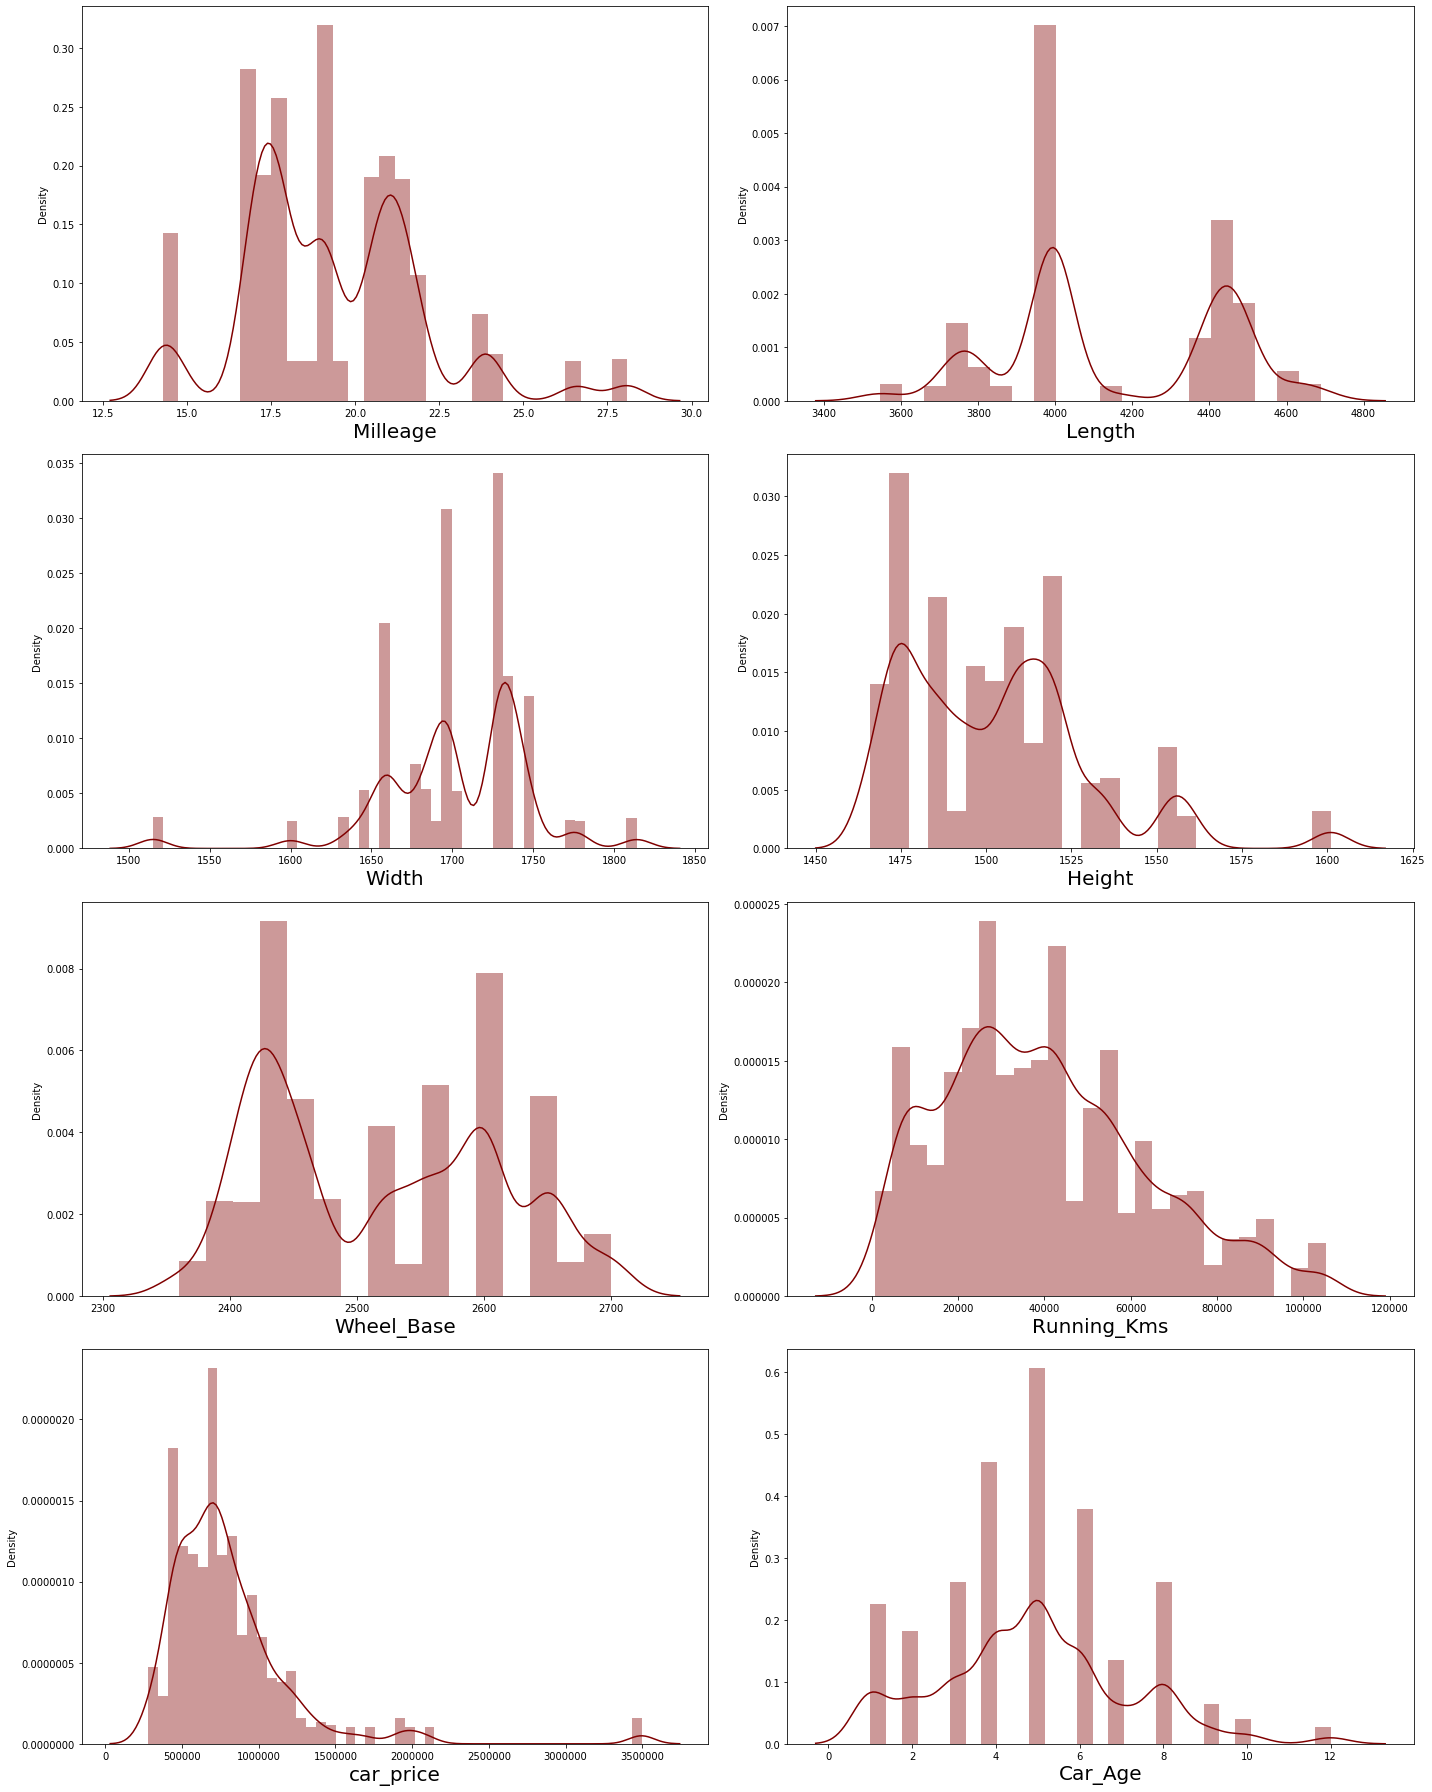

In [56]:
# Viewing the Distribution Plot for Numerical Data

plt.figure(figsize=(20,25))
plot_number=1
for i in df[numerical_data]:
    if plot_number<=8:
        ax=plt.subplot(4,2,plot_number)
        sns.distplot(df[i],color='maroon')
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.tight_layout()

We see that there is a skewness present in all the columns. We will remove the skewness using the appropriate method.

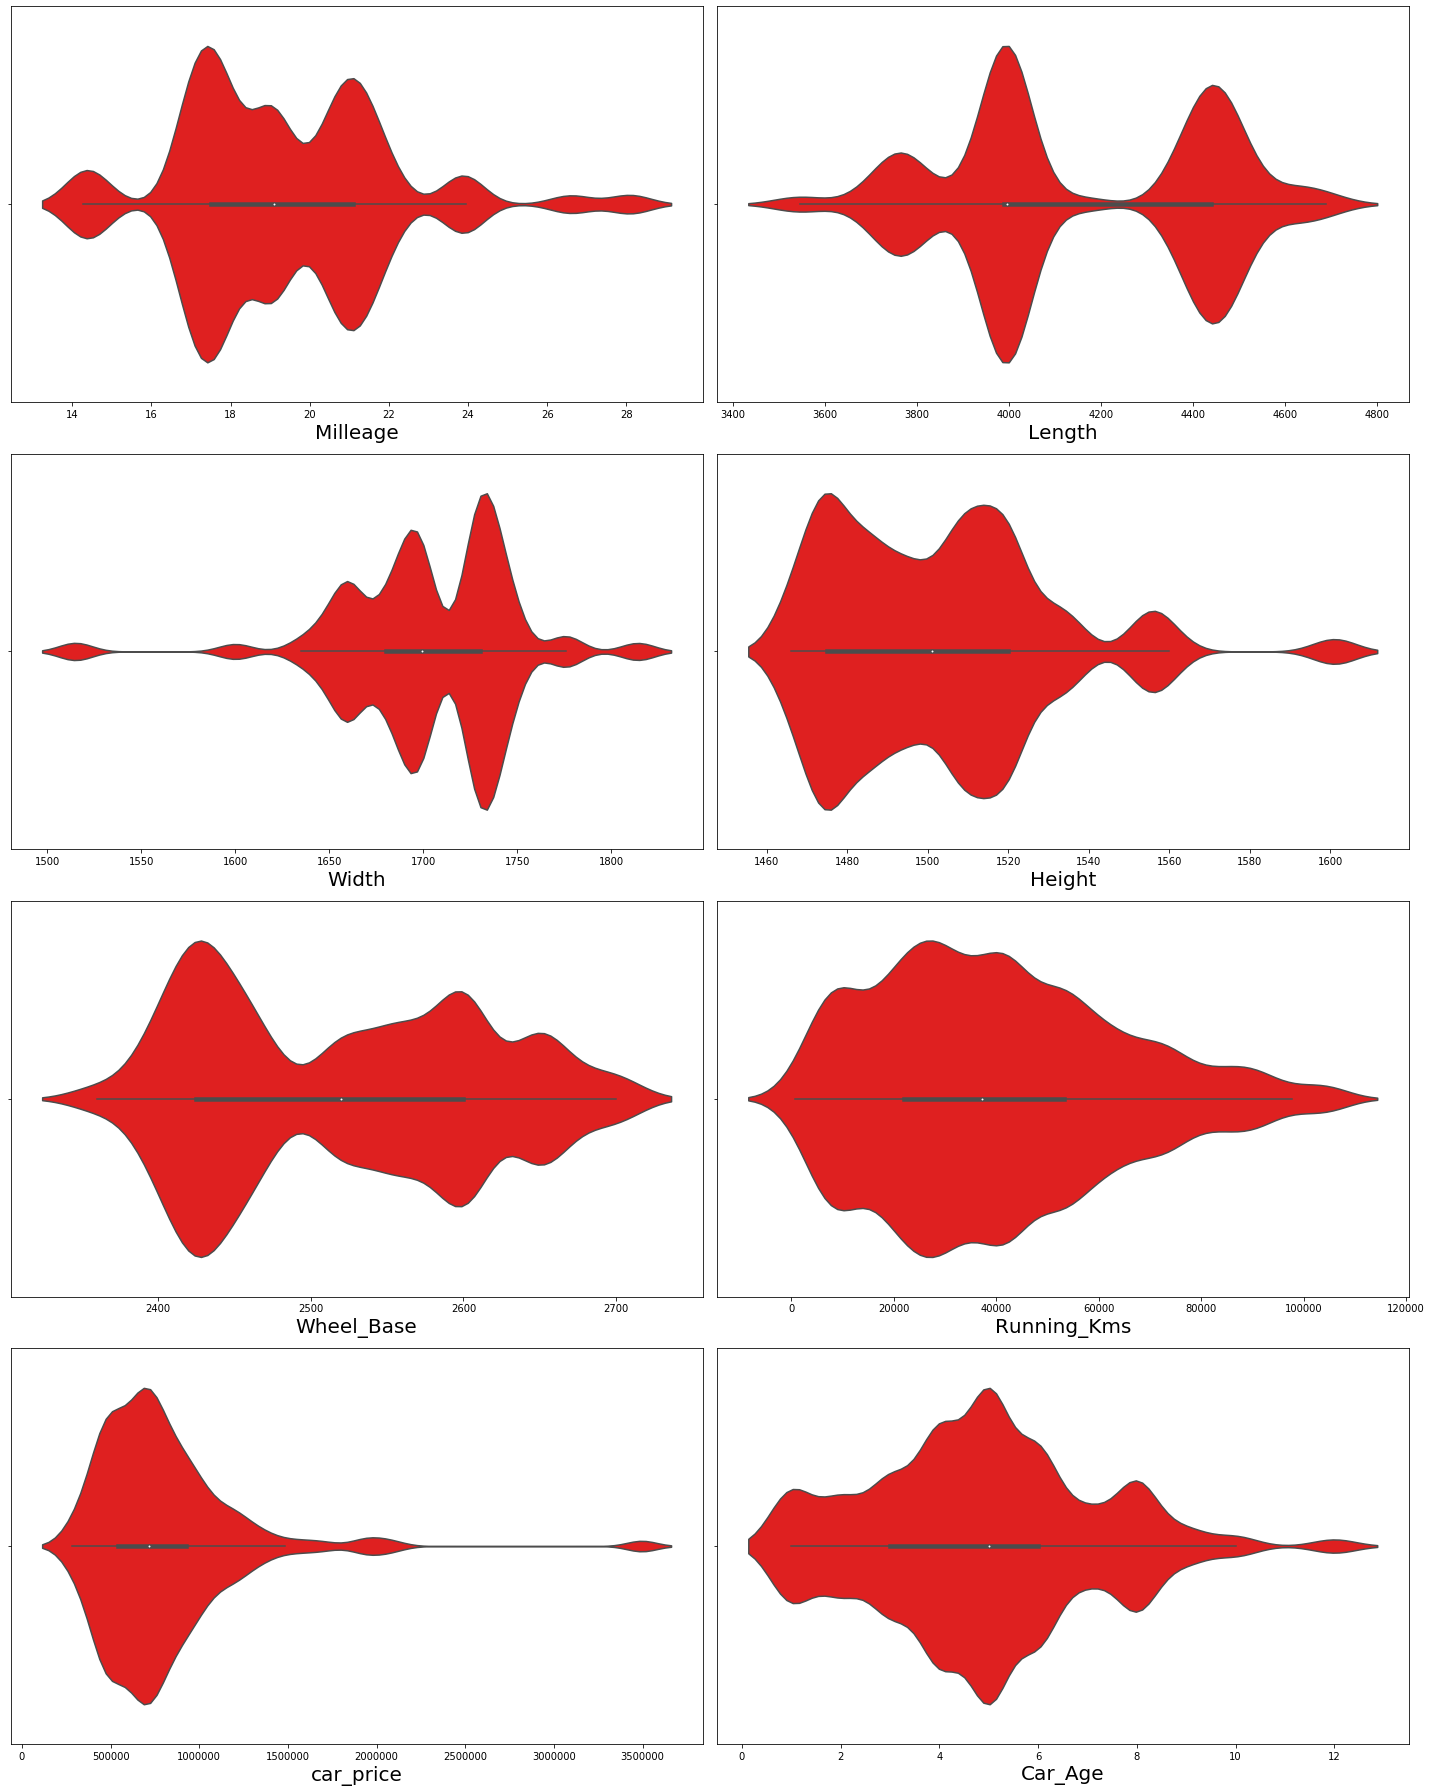

In [57]:
plt.figure(figsize=(20,25))
plot_number=1
for i in df[numerical_data]:
    if plot_number<=8:
        ax=plt.subplot(4,2,plot_number)
        sns.violinplot(df[i],color='red')
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.tight_layout()

In [58]:
data=['Milleage', 'Length', 'Width', 'Height', 'Wheel_Base', 'Running_Kms', 'Car_Age']

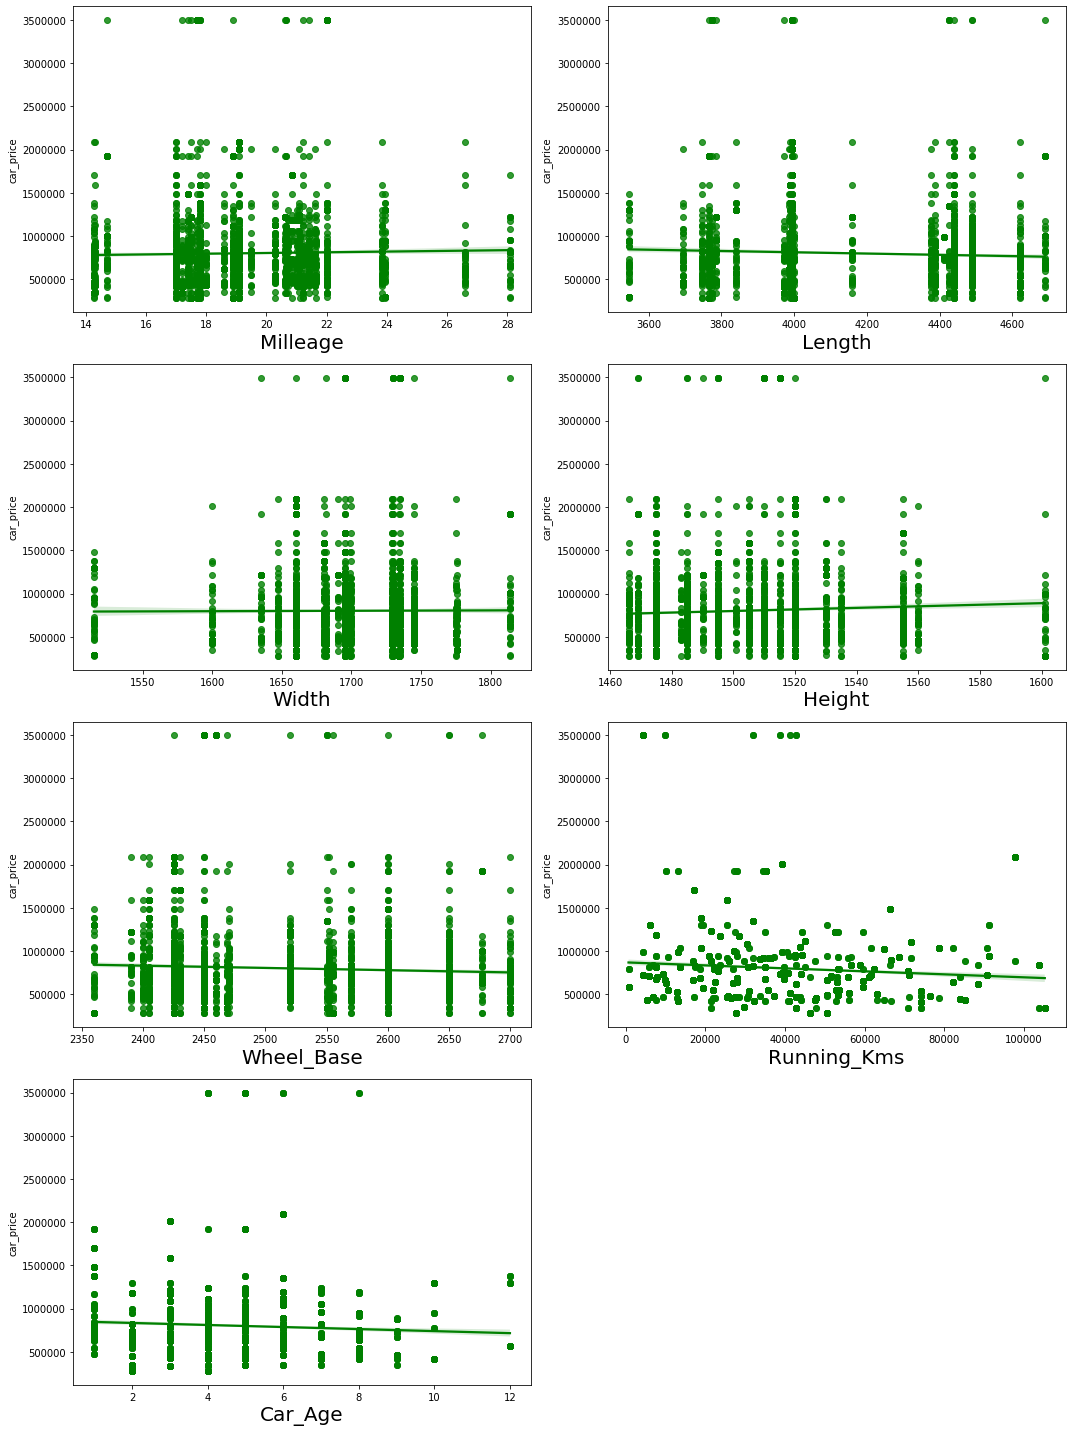

In [59]:
#Checking the regression plot for our data
plt.figure(figsize=(15,20))
for i in range(len(data)):
    plt.subplot(4,2,i+1)
    sns.regplot(x=df[data[i]],y=df['car_price'],color='green')
    plt.xlabel(data[i],fontsize=20)
    plt.tight_layout()

In [60]:
print(categorical_data)

['Fuel_Type', 'Gear Transmission', 'Engine', 'Color', 'Front Brake', 'Engine_Type', 'Cars_Name']


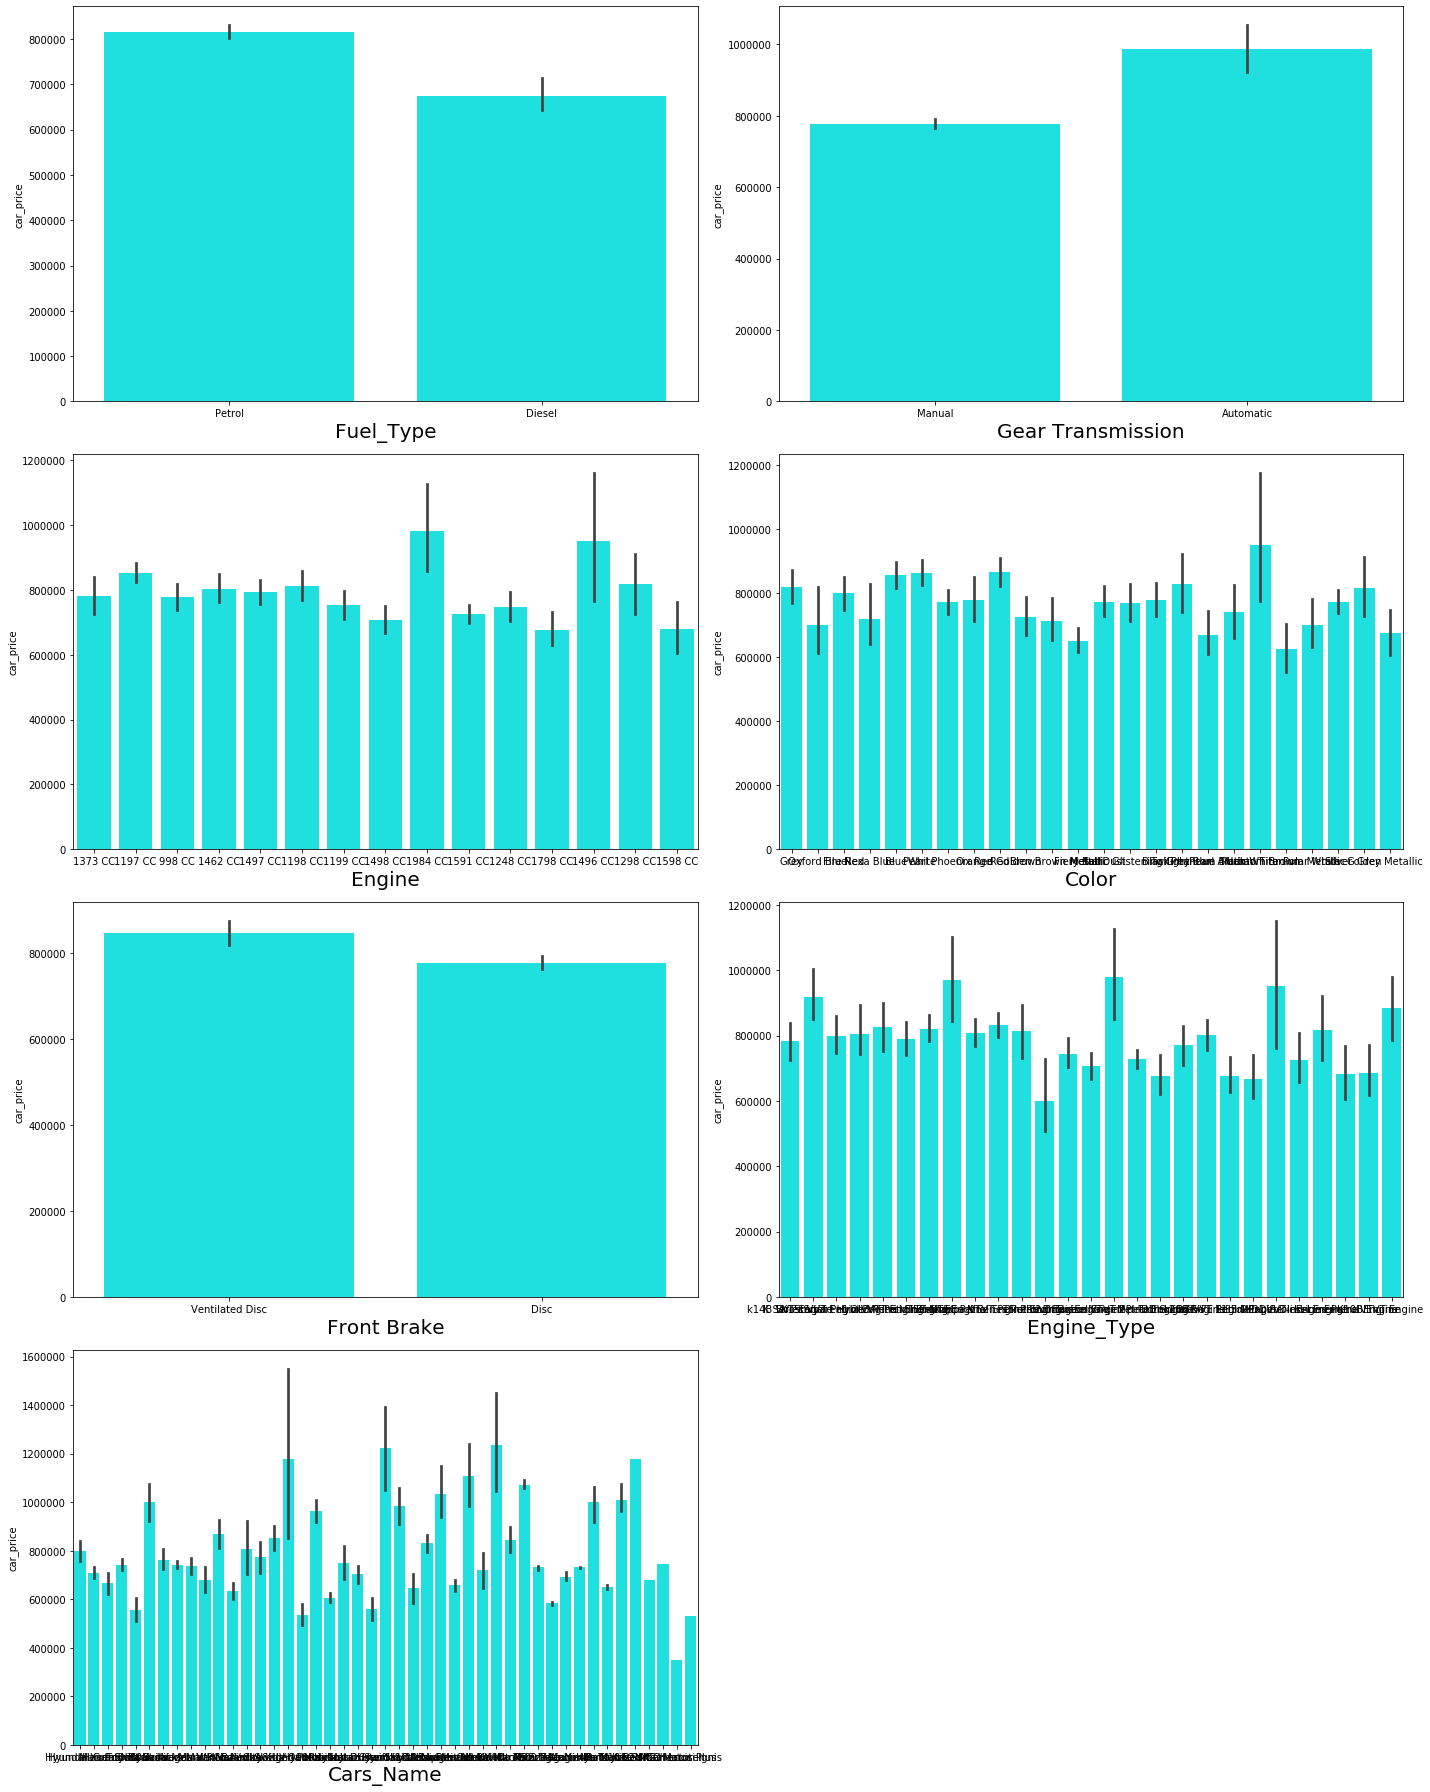

In [61]:
# Viewing the Categorical plot using the barplot
plt.figure(figsize=(20,25))
plot_number=1
for i in df[categorical_data]:
    if plot_number<=7:
        ax=plt.subplot(4,2,plot_number)
        sns.barplot(df[i],y=df['car_price'],color='aqua')
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.tight_layout()


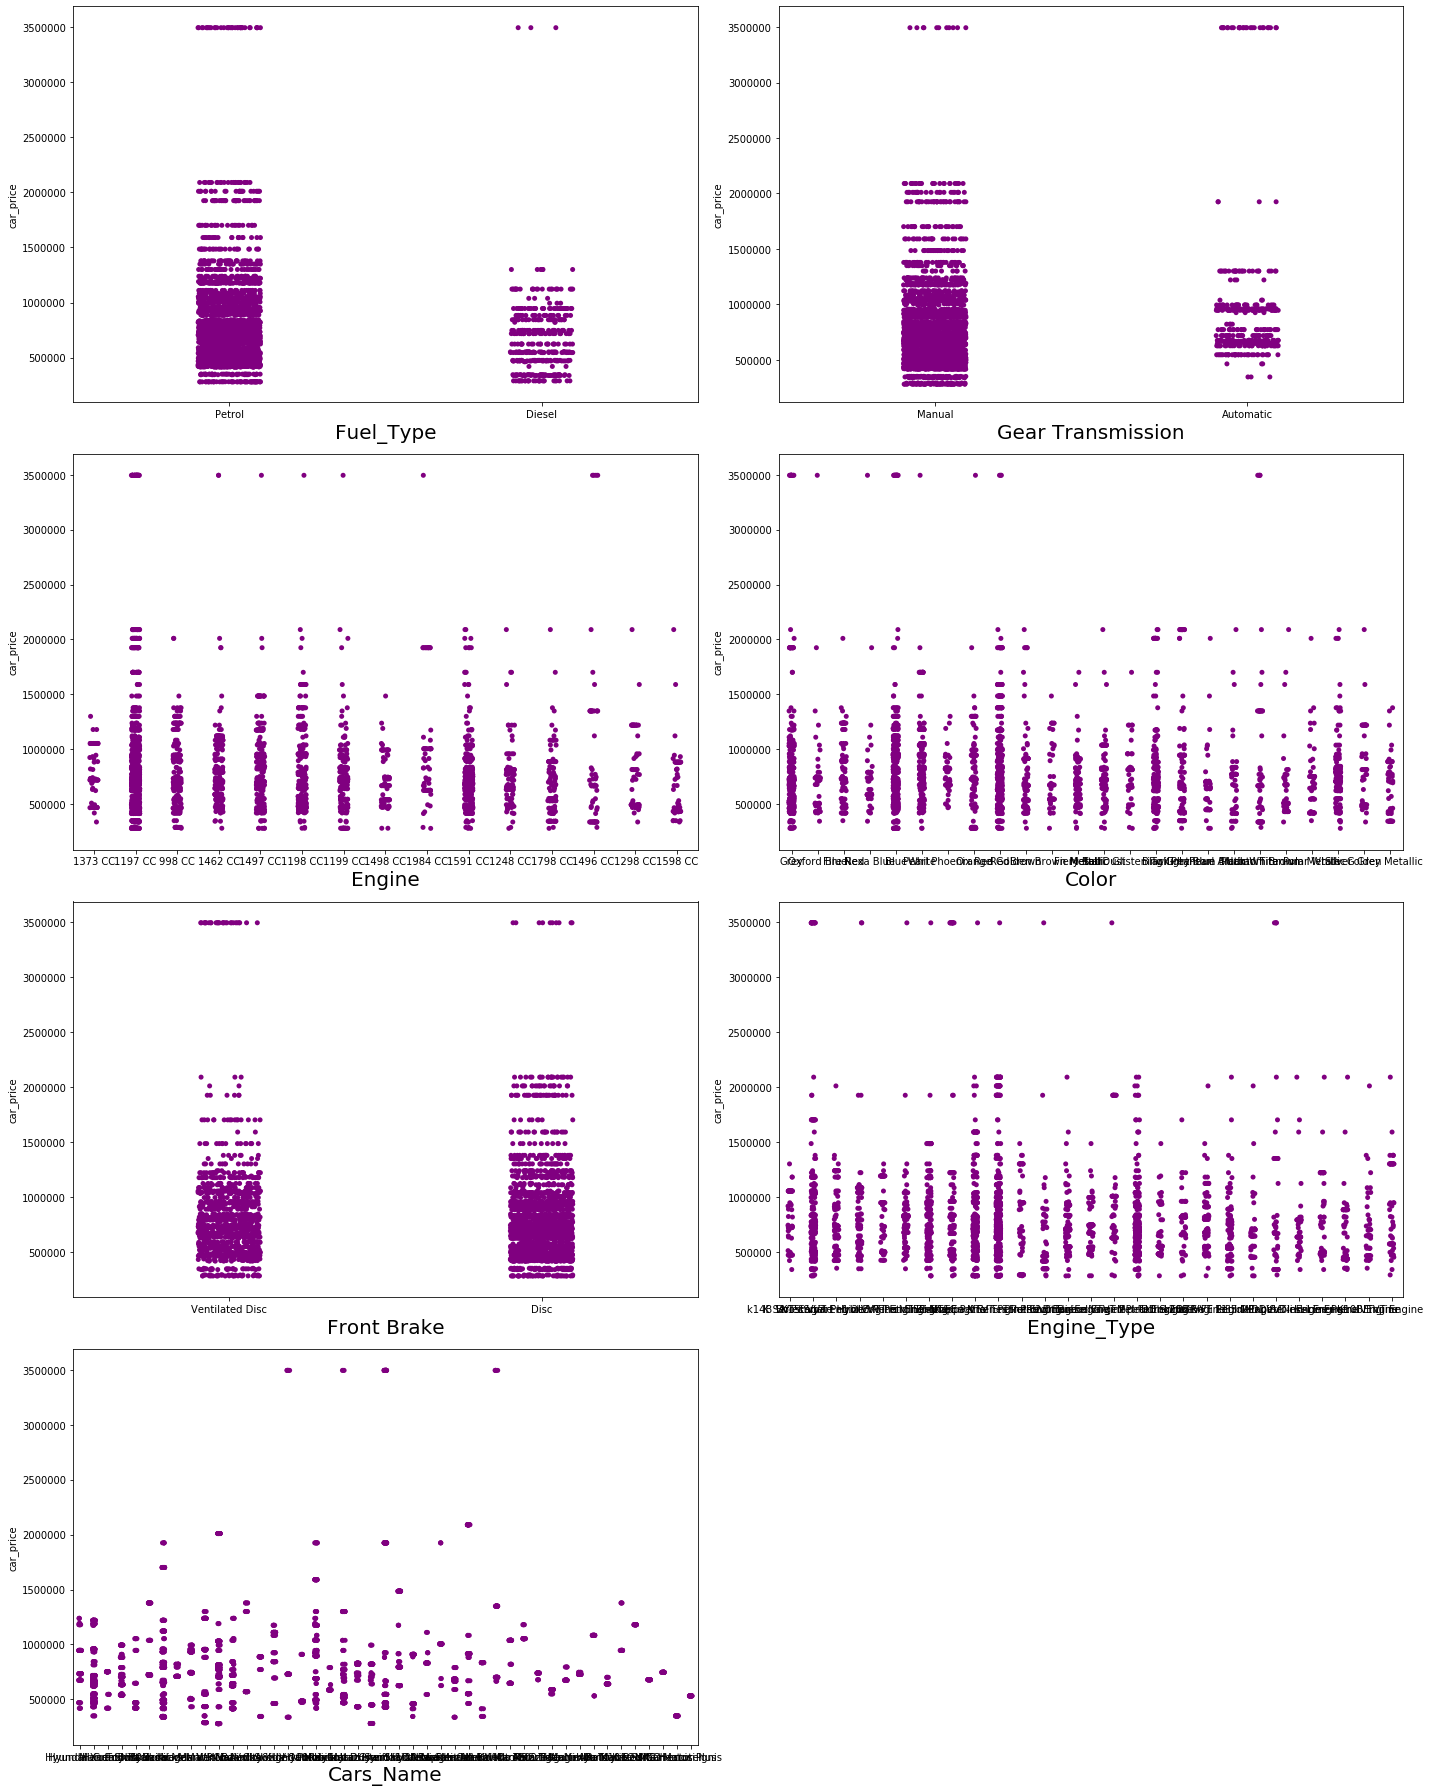

In [62]:
plt.figure(figsize=(20,25))
plot_number=1
for i in df[categorical_data]:
    if plot_number<=7:
        ax=plt.subplot(4,2,plot_number)
        sns.stripplot(df[i],y=df['car_price'],color='purple')
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.tight_layout()


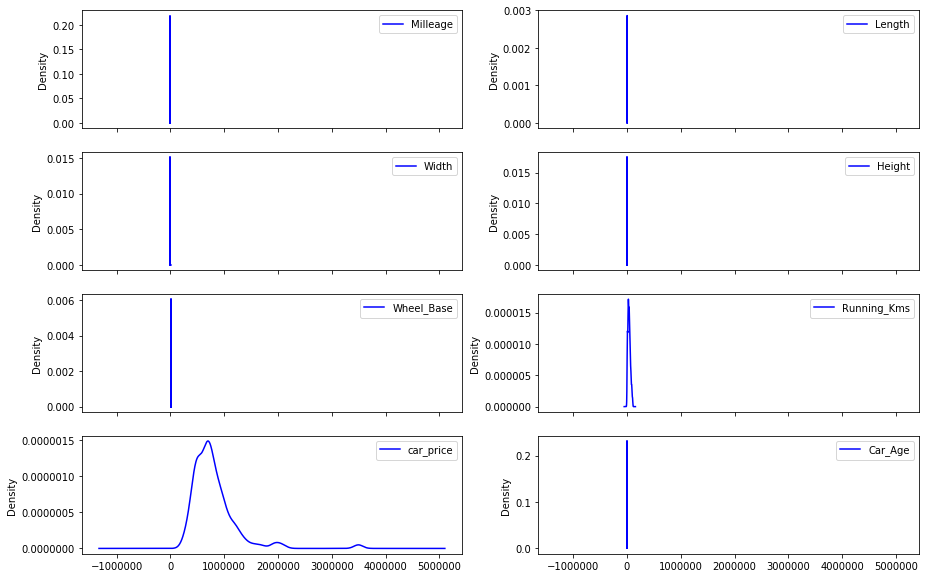

In [63]:
df.plot(kind='kde',subplots=True,layout=(4,2),color='blue',figsize=(15,10))
plt.show()

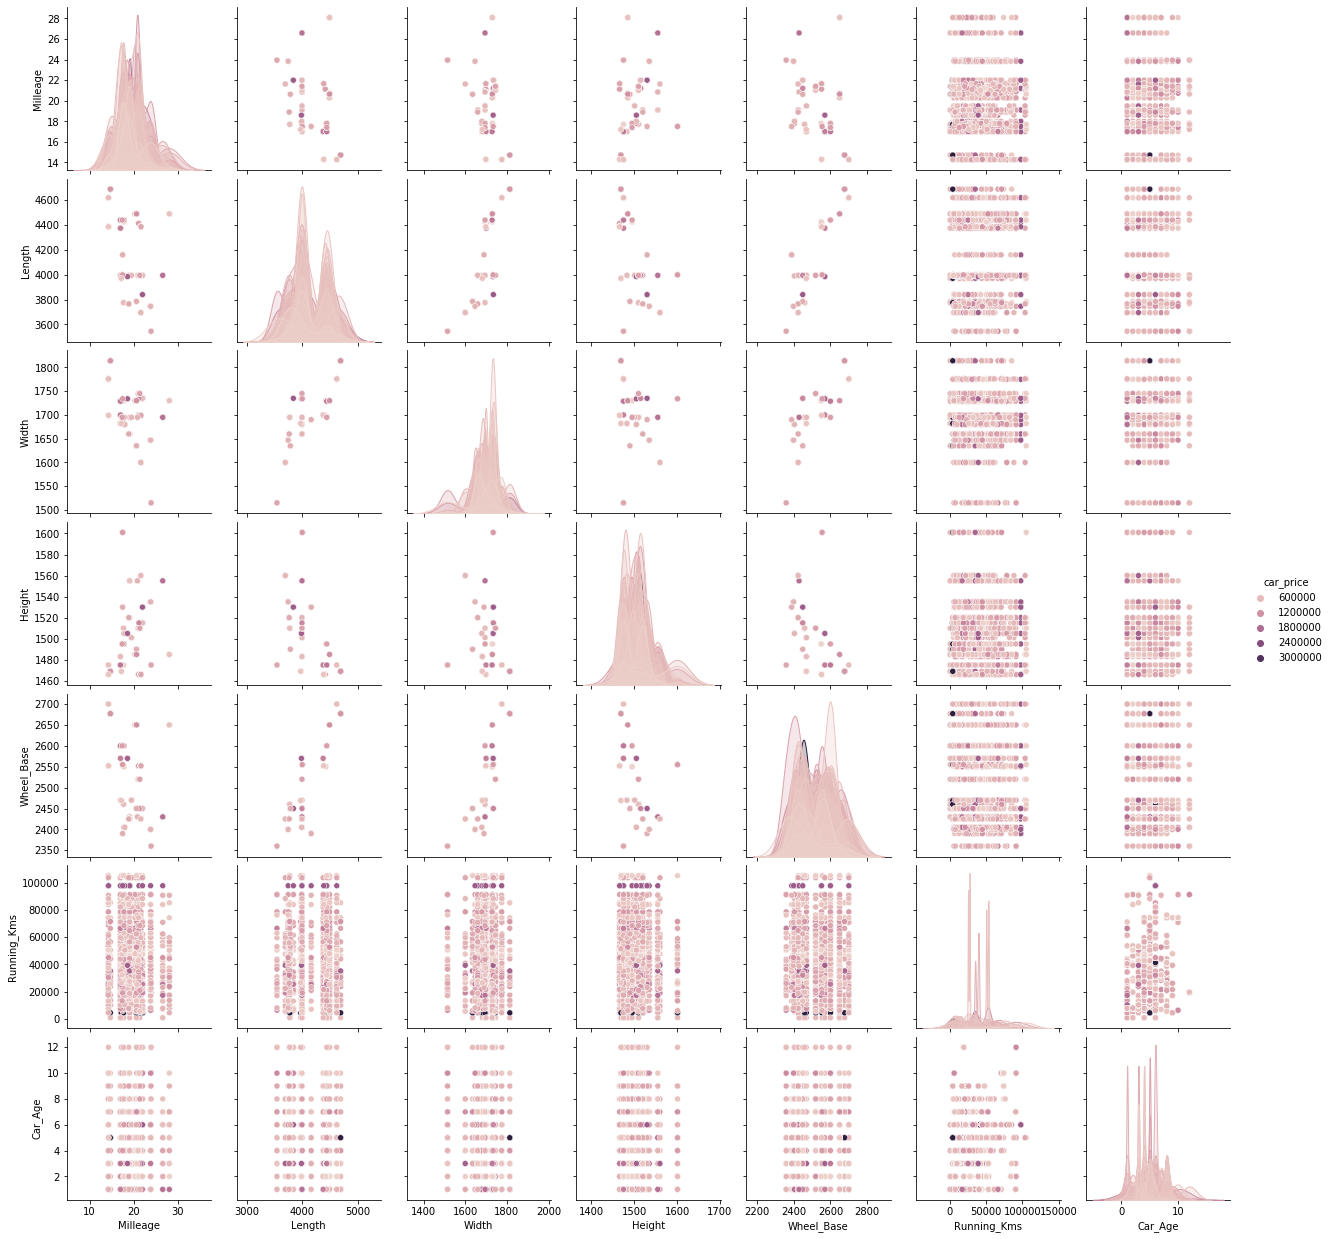

In [64]:
sns.pairplot(df,hue='car_price')

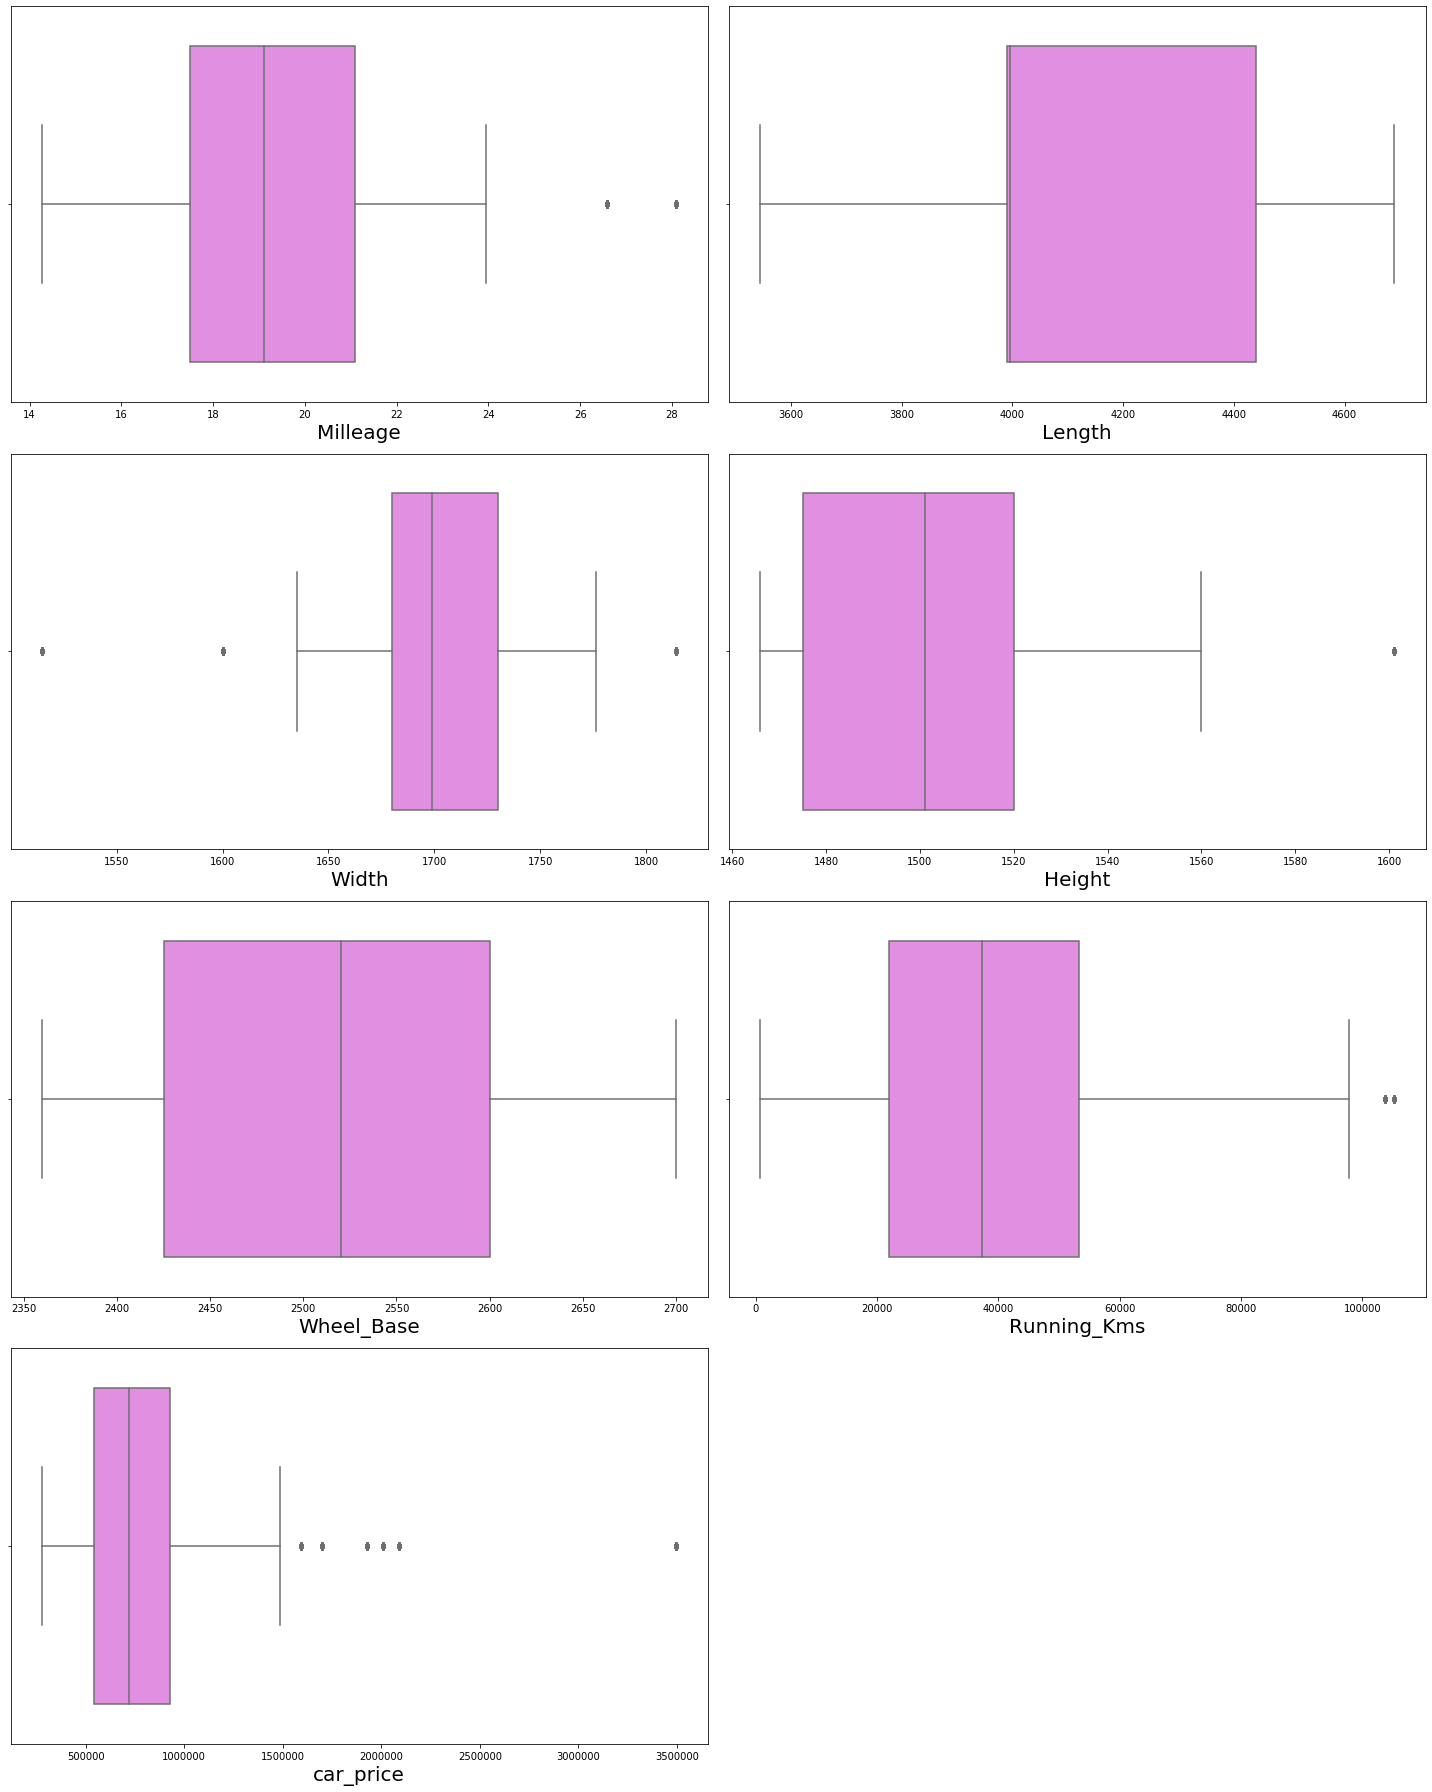

In [65]:
plt.figure(figsize=(20,25))
plot_number=1
for i in df[numerical_data]:
    if plot_number<=7:
        ax=plt.subplot(4,2,plot_number)
        sns.boxplot(df[i],color='Violet')
        plt.xlabel(i,fontsize=20)
    plot_number+=1
plt.tight_layout()

There is Outliers present in Car price, Running kms, Milleage, Width, Height

# Removing the Outliers

In [66]:
from scipy.stats import zscore

In [67]:
outliers=df[['Running_Kms','car_price','Height','Width','Milleage']]

In [68]:
z=np.abs(zscore(outliers))

In [69]:
z

array([[0.16434571, 0.77137212, 0.648196  , 0.59819417, 0.52039503],
       [0.17609068, 0.85765631, 0.44331275, 0.70750623, 0.69918135],
       [0.77361013, 0.88797238, 0.26139462, 0.92613034, 0.65820949],
       ...,
       [0.57773434, 0.19174602, 1.01203225, 4.10222427, 1.71975327],
       [0.56371615, 0.78769616, 1.230334  , 0.45120157, 0.79070465],
       [1.3411574 , 0.22335091, 1.17098524, 1.21638597, 1.6787814 ]])

In [70]:
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

,Fuel_Type,Gear Transmission,Milleage,Engine,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Cars_Name,Running_Kms,car_price,Car_Age
0,Petrol,Manual,20.73,1373 CC,Grey,Ventilated Disc,k14B VVT Engine,4490,1730,1485,2650,Hyundai Xcent,43701.0,470000.0,8.0
1,Petrol,Manual,21.21,1197 CC,Oxford Blue,Disc,K Series VVT Engine,3995,1735,1515,2450,Hyundai Grand i10,43980.0,433000.0,8.0
2,Petrol,Manual,21.10,998 CC,Fire Red,Disc,Boosterjet Petrol Engine,3995,1745,1510,2520,Honda Brio,21420.0,420000.0,8.0
3,Petrol,Manual,20.65,1462 CC,Nexa Blue,Ventilated Disc,K15 Smart Hybrid Petrol Engine,4490,1730,1485,2650,Maruti Swift Dzire,752.0,790000.0,1.0
4,Petrol,Manual,21.01,1197 CC,Blue,Disc,1.2L VVT Engine,3995,1745,1510,2520,Toyota Yaris,7599.0,946000.0,4.0


In [71]:
df.shape

(3693, 15)

In [72]:
df_new.shape

(3437, 15)

In [73]:
data_loss=((3693-3437)/3693)*100

In [74]:
data_loss

6.932033577037639

6.9% of data has removed in the Outliers removal process.

# Skewness

In [75]:
df.skew()

Milleage       0.694082
Length         0.060515
Width         -1.128969
Height         1.030589
Wheel_Base     0.232894
Running_Kms    0.583913
car_price      3.112954
Car_Age        0.348140
dtype: float64

car_price is our target varaible, so we can ignore it. There is no high skewness is present in the data.

# Converting the Categorical data to numerical data

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
# Let's convert the categorical data to numerical data using the Label Encoder
le=LabelEncoder()
le

LabelEncoder()

In [78]:
df_new[categorical_data]=df_new[categorical_data].apply(le.fit_transform)

In [79]:
df_new[categorical_data].head()

,Fuel_Type,Gear Transmission,Engine,Color,Front Brake,Engine_Type,Cars_Name
0,1,1,5,7,1,23,15
1,1,1,0,10,0,10,10
2,1,1,14,4,0,5,3
3,1,1,6,9,1,12,31
4,1,1,0,1,0,0,41


In [80]:
df_new.dtypes

Fuel_Type              int32
Gear Transmission      int32
Milleage             float64
Engine                 int32
Color                  int32
Front Brake            int32
Engine_Type            int32
Length                 int64
Width                  int64
Height                 int64
Wheel_Base             int64
Cars_Name              int32
Running_Kms          float64
car_price            float64
Car_Age              float64
dtype: object

We have converted the categorical data to numerical data.

# Correlation

In [81]:
df_new.corr()

,Fuel_Type,Gear Transmission,Milleage,Engine,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Cars_Name,Running_Kms,car_price,Car_Age
Fuel_Type,1.000000,0.049743,0.090059,-0.083538,0.049668,0.020952,0.033734,-0.076747,-0.056399,0.058681,-0.068600,-0.032370,-0.278064,0.129620,-0.006692
Gear Transmission,0.049743,1.000000,-0.037343,-0.000782,-0.013068,0.035338,0.003920,0.049958,-0.005448,-0.004199,0.022713,-0.062870,0.008939,-0.027707,-0.048015
Milleage,0.090059,-0.037343,1.000000,-0.372561,0.013509,0.075948,-0.040504,-0.515146,-0.240030,0.593486,-0.415659,0.055406,-0.022871,0.022503,-0.009838
Engine,-0.083538,-0.000782,-0.372561,1.000000,-0.147007,0.126955,-0.161841,0.673916,0.385020,-0.514434,0.679852,-0.048805,0.006078,-0.040904,-0.014277
Color,0.049668,-0.013068,0.013509,-0.147007,1.000000,-0.063590,0.153874,-0.052552,-0.045184,0.140568,-0.144534,0.041156,0.005237,0.036574,-0.091035
Front Brake,0.020952,0.035338,0.075948,0.126955,-0.063590,1.000000,-0.023962,0.260381,0.115107,0.165153,0.277262,0.029686,-0.025695,0.037758,-0.034823
Engine_Type,0.033734,0.003920,-0.040504,-0.161841,0.153874,-0.023962,1.000000,0.020736,-0.250427,-0.121211,0.021536,-0.031802,-0.021387,0.024794,0.041730
Length,-0.076747,0.049958,-0.515146,0.673916,-0.052552,0.260381,0.020736,1.000000,0.614087,-0.740553,0.899501,-0.070762,0.035011,-0.021200,-0.056671
Width,-0.056399,-0.005448,-0.240030,0.385020,-0.045184,0.115107,-0.250427,0.614087,1.000000,-0.466543,0.694917,0.038852,-0.030998,0.000114,0.031305
Height,0.058681,-0.004199,0.593486,-0.514434,0.140568,0.165153,-0.121211,-0.740553,-0.466543,1.000000,-0.738925,0.072670,-0.062498,0.078985,-0.034981


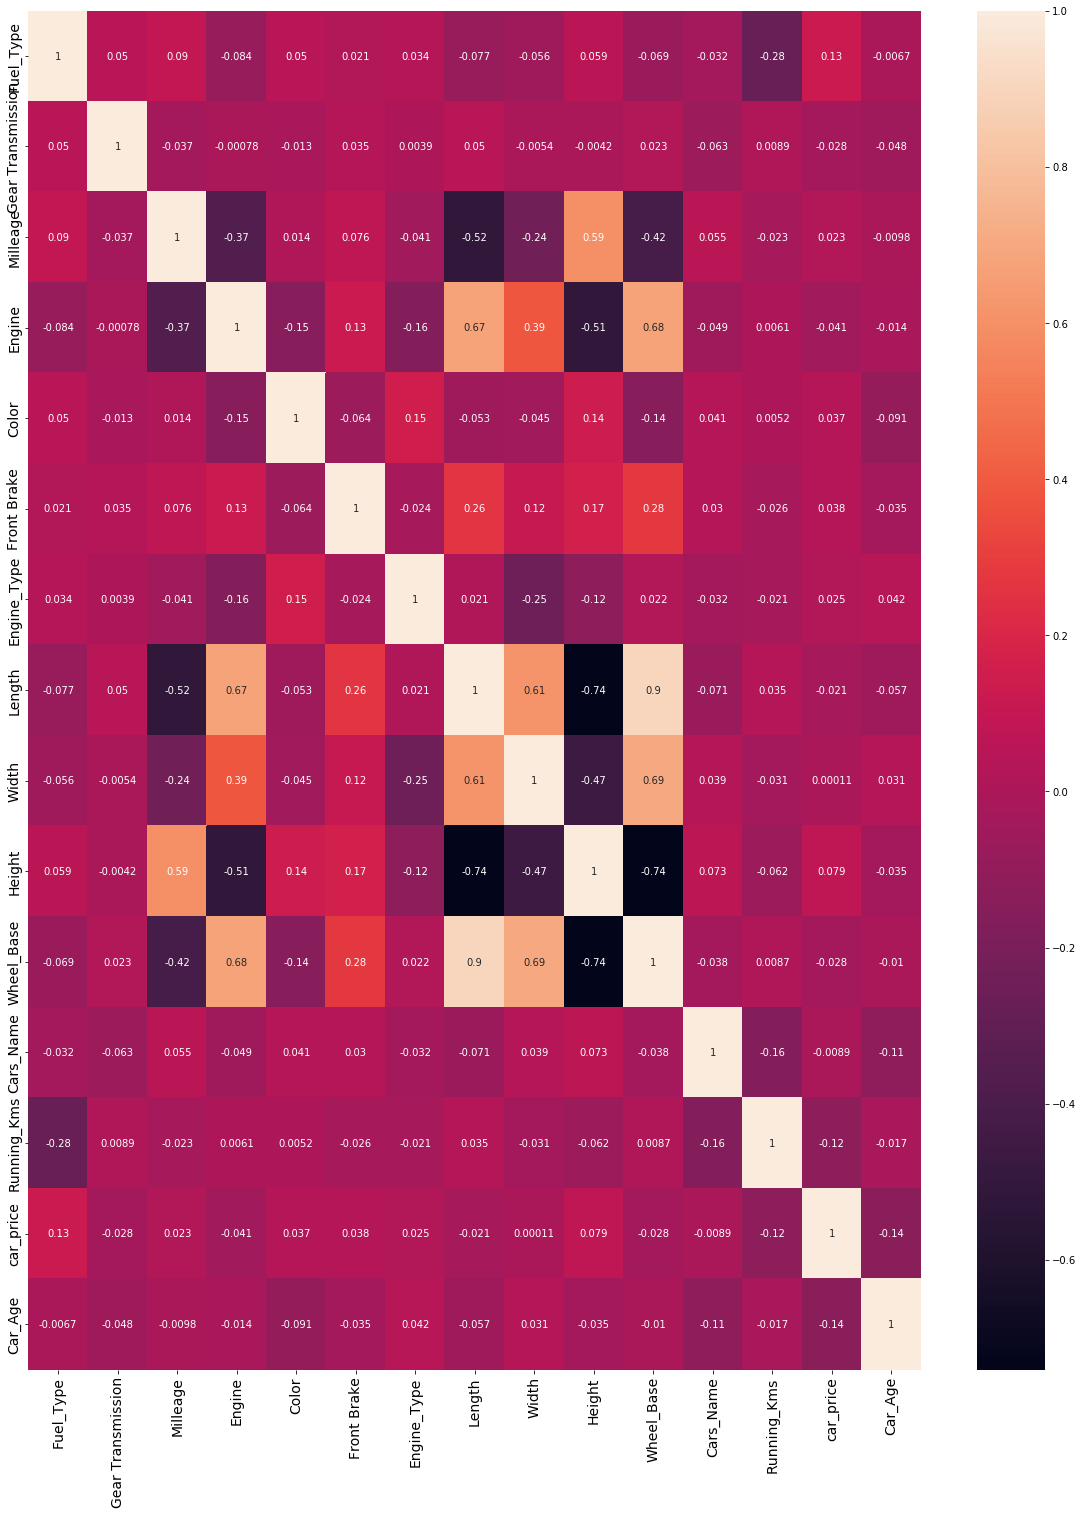

In [82]:
plt.figure(figsize=(20,25))
sns.heatmap(df_new.corr(),annot=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

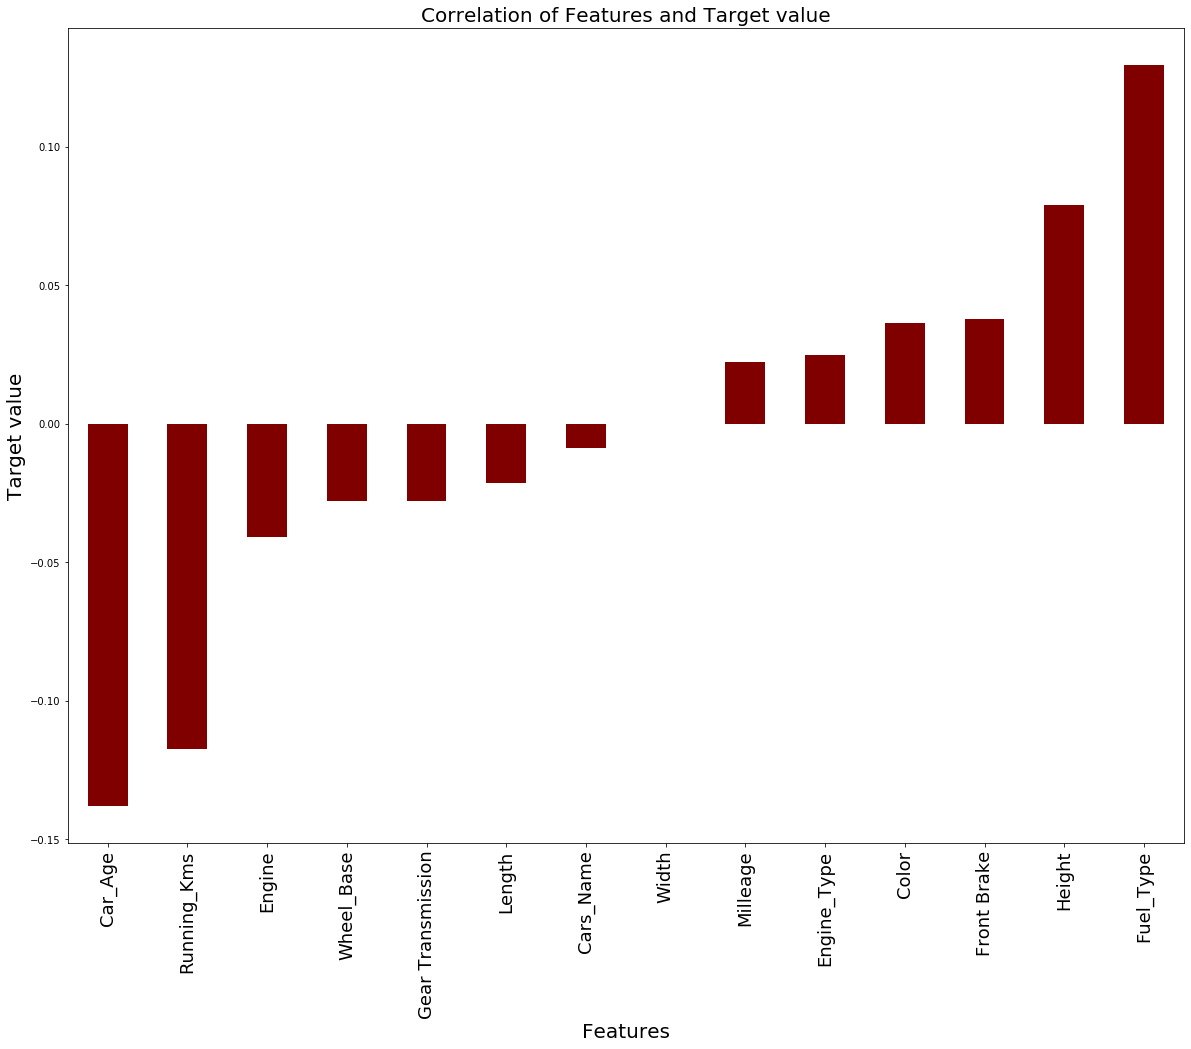

In [83]:
plt.figure(figsize=(20,15))
df_new.corr()['car_price'].sort_values(ascending=True).drop(['car_price']).plot(kind='bar',color='Maroon')
plt.xlabel('Features',fontsize=20)
plt.xticks(fontsize=18)
plt.ylabel('Target value',fontsize=20)
plt.title("Correlation of Features and Target value",fontsize=20)
plt.show()

# Separating the Feature(x) and target(y) variables

In [86]:
x=df_new.drop(columns='car_price',axis=1)
x.head()

,Fuel_Type,Gear Transmission,Milleage,Engine,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Cars_Name,Running_Kms,Car_Age
0,1,1,20.73,5,7,1,23,4490,1730,1485,2650,15,43701.0,8.0
1,1,1,21.21,0,10,0,10,3995,1735,1515,2450,10,43980.0,8.0
2,1,1,21.10,14,4,0,5,3995,1745,1510,2520,3,21420.0,8.0
3,1,1,20.65,6,9,1,12,4490,1730,1485,2650,31,752.0,1.0
4,1,1,21.01,0,1,0,0,3995,1745,1510,2520,41,7599.0,4.0


In [87]:
y=df_new['car_price']
y.head()

0    470000.0
1    433000.0
2    420000.0
3    790000.0
4    946000.0
Name: car_price, dtype: float64

# Standard Scaler

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
sc=StandardScaler()
sc

StandardScaler()

In [91]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head(7)

,Fuel_Type,Gear Transmission,Milleage,Engine,Color,Front Brake,Engine_Type,Length,Width,Height,Wheel_Base,Cars_Name,Running_Kms,Car_Age
0,0.341517,0.330795,0.670355,0.047347,-0.328767,1.599366,1.403652,1.181511,0.641483,-0.682062,1.431104,-0.398870,0.177609,1.404596
1,0.341517,0.330795,0.870331,-0.997146,0.086919,-0.625248,-0.616466,-0.588742,0.770584,0.546751,-0.751146,-0.817239,0.189674,1.404596
2,0.341517,0.330795,0.824503,1.927435,-0.744454,-0.625248,-1.393435,-0.588742,1.028785,0.341949,0.012641,-1.402957,-0.785911,1.404596
3,0.341517,0.330795,0.637026,0.256246,-0.051643,1.599366,-0.305678,1.181511,0.641483,-0.682062,1.431104,0.939914,-1.679679,-1.728172
4,0.341517,0.330795,0.787007,-0.997146,-1.160140,-0.625248,-2.170403,-0.588742,1.028785,0.341949,0.012641,1.776654,-1.383587,-0.385557
5,0.341517,0.330795,0.949488,-0.997146,1.611102,-0.625248,0.937471,-0.588742,1.028785,0.341949,0.012641,1.107262,-1.126588,-1.728172
6,0.341517,0.330795,-0.716978,0.674043,1.611102,1.599366,1.092865,1.002697,-0.262220,-0.272458,0.885541,-0.482544,0.130602,-0.833096


# Variation Inflation Factor

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Fuel_Type,1.117888
1,Gear Transmission,1.019247
2,Milleage,1.708517
3,Engine,2.349322
4,Color,1.162139
5,Front Brake,1.869114
6,Engine_Type,1.401899
7,Length,7.195435
8,Width,2.678726
9,Height,4.688365


There is no high inflation factor present in data. There is no muticollinearity exist.

# Model Building

Our target data is continuous, Hence it is a Regression problem.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

### Finding the Best random state

In [97]:
max_acc=0
max_rs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    rf_pred=rf.predict(x_test)
    acc=r2_score(y_test,rf_pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best Accuracy is", max_acc, "On Random State",max_rs)

Best Accuracy is 0.9272888093858142 On Random State 84


We got the best accuracy 92% and best random state is 84.

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=84)

# Random Forest Regressor

In [127]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print("Predicted value:\n",rfr_pred)

Predicted value:
 [1241380.90909091 1434564.64701965  634000.         ...  468000.
  680020.          635777.85714286]


In [107]:
print("R2 Score is:",r2_score(y_test,rfr_pred)*100)
print("Mean Squared Error value is:",mean_squared_error(y_test,rfr_pred))
print("Mean Absolute Error value is:",mean_absolute_error(y_test,rfr_pred))

R2 Score is: 92.5830831675461
Mean Squared Error value is: 7466378775.91398
Mean Absolute Error value is: 39589.22778808122


# Decision Tree Regressor

In [126]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
print("Predicted value:\n",dtr_pred)

Predicted value:
 [1378000.         1557777.77777778  634000.         ...  468000.
  655000.          571000.        ]


In [109]:
print("R2 Score is:",r2_score(y_test,dtr_pred)*100)
print("Mean Squared Error value is:",mean_squared_error(y_test,dtr_pred))
print("Mean Absolute Error value is:",mean_absolute_error(y_test,dtr_pred))

R2 Score is: 86.62796697375714
Mean Squared Error value is: 13461208455.391056
Mean Absolute Error value is: 32209.619974663583


# KNeighborsRegressor

In [125]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print("Predicted value\n",knn_pred)

Predicted value
 [604400. 786000. 634000. ... 468000. 715000. 800200.]


In [111]:
print("R2 Score is:",r2_score(y_test,knn_pred)*100)
print("Mean Squared Error value is:",mean_squared_error(y_test,knn_pred))
print("Mean Absolute Error value is:",mean_absolute_error(y_test,knn_pred))

R2 Score is: 43.472681385053
Mean Squared Error value is: 56904288062.0155
Mean Absolute Error value is: 131605.03875968992


# Grandient Boosting Regressor

In [124]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
print("Predicted value:\n",gbr_pred)

Predicted value:
 [1209754.46115539 1050863.79471292  712577.81160378 ...  743921.97439198
  685178.15106721  707931.18386441]


In [121]:
print("R2 Score is:",r2_score(y_test,gbr_pred)*100)
print("Mean Squared Error value is:",mean_squared_error(y_test,gbr_pred))
print("Mean Absolute Error value is:",mean_absolute_error(y_test,gbr_pred))

R2 Score is: 65.19474785919441
Mean Squared Error value is: 35037361446.11287
Mean Absolute Error value is: 132600.1667176239


# XGBRegressor

In [122]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [123]:
xgb_pred=xgb.predict(x_test)
print("Predicted value:\n",xgb_pred)

Predicted value:
 [1242898.6  1261912.2   633448.56 ...  470941.44  652090.6   559514.5 ]


In [129]:
print("R2 Score is:",r2_score(y_test,xgb_pred)*100)
print("Mean Squared Error value is:",mean_squared_error(y_test,xgb_pred))
print("Mean Absolute Error value is:",mean_absolute_error(y_test,xgb_pred))

R2 Score is: 91.16161215194505
Mean Squared Error value is: 8897329299.050596
Mean Absolute Error value is: 45306.255041787794


# Bagging Regressor

In [134]:
br=BaggingRegressor()
br.fit(x_train,y_train)

BaggingRegressor()

In [135]:
br_pred=br.predict(x_test)
print("Predicted value:\n",br_pred)

Predicted value:
 [1351800.         1412066.66666667  634000.         ...  468000.
  693300.          596000.        ]


In [136]:
print("R2 Score is:",r2_score(y_test,br_pred)*100)
print("Mean Squared Error value is:",mean_squared_error(y_test,br_pred))
print("Mean Absolute Error value is:",mean_absolute_error(y_test,br_pred))

R2 Score is: 91.24131766443082
Mean Squared Error value is: 8817092246.35194
Mean Absolute Error value is: 41657.43073759788


# Ada Boost Regressor

In [137]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [138]:
ada_pred=ada.predict(x_test)
print("Predicted value:\n",ada_pred)

Predicted value:
 [860545.93639576 889570.94594595 809314.49407475 ... 860545.93639576
 748161.52450091 889570.94594595]


In [139]:
print("R2 Score is:",r2_score(y_test,ada_pred)*100)
print("Mean Squared Error value is:",mean_squared_error(y_test,ada_pred))
print("Mean Absolute Error value is:",mean_absolute_error(y_test,ada_pred))

R2 Score is: 21.45350917963227
Mean Squared Error value is: 79070301748.2382
Mean Absolute Error value is: 227759.65891392328


In [141]:
for rg in (dtr,rfr,gbr,xgb,ada,knn,br):
    rg.fit(x_train,y_train)
    rg_pred=rg.predict(x_test)
    print(rg.__class__.__name__,r2_score(y_test,rg_pred)*100)

DecisionTreeRegressor 88.57220237421797
RandomForestRegressor 92.6281336821758
GradientBoostingRegressor 65.205231754964
XGBRegressor 91.16161215194505
AdaBoostRegressor 20.098204575707012
KNeighborsRegressor 43.472681385053
BaggingRegressor 90.98723364744981


Random Forest Regressor gives a good r2_score 93%.

# Cross Validation Score

In [143]:
print("Cross Validation Score for Decision Tree Regressor:",cross_val_score(dtr,x,y,cv=10).mean()*100)

Cross Validation Score for Decision Tree Regressor: 65.57247022322025


In [148]:
print("Cross Validation Score for Random Forest Regressor:",cross_val_score(rfr,x,y,cv=10).mean()*100)

Cross Validation Score for Random Forest Regressor: 71.97776658117385


In [149]:
print("Cross Validation Score for Grandient Boosting Regressor:",cross_val_score(gbr,x,y,cv=10).mean()*100)

Cross Validation Score for Grandient Boosting Regressor: 59.082203760525765


In [150]:
print("Cross Validation Score for XGB Regressor Regressor:",cross_val_score(xgb,x,y,cv=10).mean()*100)

Cross Validation Score for XGB Regressor Regressor: 73.24844444137449


In [151]:
print("Cross Validation Score for Ada Boost Regressor:",cross_val_score(ada,x,y,cv=10).mean()*100)

Cross Validation Score for Ada Boost Regressor: 17.4140808942973


In [152]:
print("Cross Validation Score for KNeighbors Regressor:",cross_val_score(knn,x,y,cv=10).mean()*100)

Cross Validation Score for KNeighbors Regressor: 30.013527260167454


In [153]:
print("Cross Validation Score for Bagging Regressor:",cross_val_score(br,x,y,cv=10).mean()*100)

Cross Validation Score for Bagging Regressor: 71.58257467216062


 By analysis of various machine learning model Random Forest Regressor gives a good r2 score 93%. I will consider Random Forest Regressor is my best model for this project. Let's do the hyper parameter tuning to check if we can increase the score further.

# Hyper Parameter Tuning

In [154]:
from sklearn.model_selection import GridSearchCV

In [184]:
params={'n_estimators':[50,60],
       'max_features':['auto','log2'],
       'max_depth':range(3,10,3),
        'criterion':['squared_error','absolute_error'],
        'min_samples_split':range(3,10,3)}

In [185]:
grid_search=GridSearchCV(estimator=rfr,param_grid=params,cv=5,verbose=3)

In [186]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50;, score=0.279 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50;, score=0.221 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50;, score=0.191 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50;, score=0.236 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=50;, score=0.158 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3, n_estimators=60;, score=0.269 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3, n_estim

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(3, 10, 3),
                         'max_features': ['auto', 'log2'],
                         'min_samples_split': range(3, 10, 3),
                         'n_estimators': [50, 60]},
             verbose=3)

In [187]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 60}

In [188]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_split=6, n_estimators=60)

In [197]:
final_model=RandomForestRegressor(criterion='squared_error',max_depth=9,max_features='auto',min_samples_split=6,n_estimators=60)
final_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_split=6, n_estimators=60)

In [198]:
final_model_pred=final_model.predict(x_test)
print("Predicted value:\n",final_model_pred)

Predicted value:
 [1157989.36257627 1317746.46419943  649855.9745699  ...  603333.74735824
  704272.00324607  693658.14892224]


In [199]:
print("R2 Score is:",r2_score(y_test,final_model_pred)*100)
print("Mean Squared Error value is:",mean_squared_error(y_test,final_model_pred))
print("Mean Absolute Error value is:",mean_absolute_error(y_test,final_model_pred))

R2 Score is: 79.45825248471111
Mean Squared Error value is: 20678736344.62656
Mean Absolute Error value is: 96992.86959407124


# Saving the model

In [200]:
import pickle

In [201]:
filename='car_price_predictions.pickle'

In [202]:
pickle.dump(final_model,open(filename,'wb'))

In [203]:
loaded_model=pickle.load(open(filename,'rb'))

In [207]:
loaded_model_pred=loaded_model.predict(x_test)
print("Predicted value:\n",loaded_model_pred)

Predicted value:
 [1157989.36257627 1317746.46419943  649855.9745699  ...  603333.74735824
  704272.00324607  693658.14892224]


In [205]:
df=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Actual", "Predicted"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [206]:
df.to_csv("Predicted_car_price.csv")

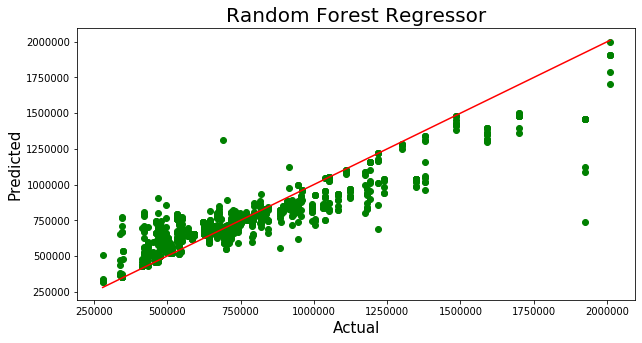

In [210]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, loaded_model_pred, c='green')
p1 = max(max(loaded_model_pred), max(y_test))
p2 = min(min(loaded_model_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Random Forest Regressor",fontsize=20)
plt.show()

We have predicted the Used car price and saved the model.